# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 1 - Extraction

In [1]:
import pandas as pd
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = 'F:/semester9/Data Engineering/project/'
fintech = pd.read_csv(data_dir + 'fintech_data_21_52_23665.csv')
fintech.columns = fintech.columns.str.lower().str.replace(' ', '_')




# 2- EDA

# What are the States with the Highest Annual Income Over the Years

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2502746749.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_income_states = income_by_state_year.groupby('issue_date').apply(lambda x: x[x['annual_inc'] == x['annual_inc'].max()])


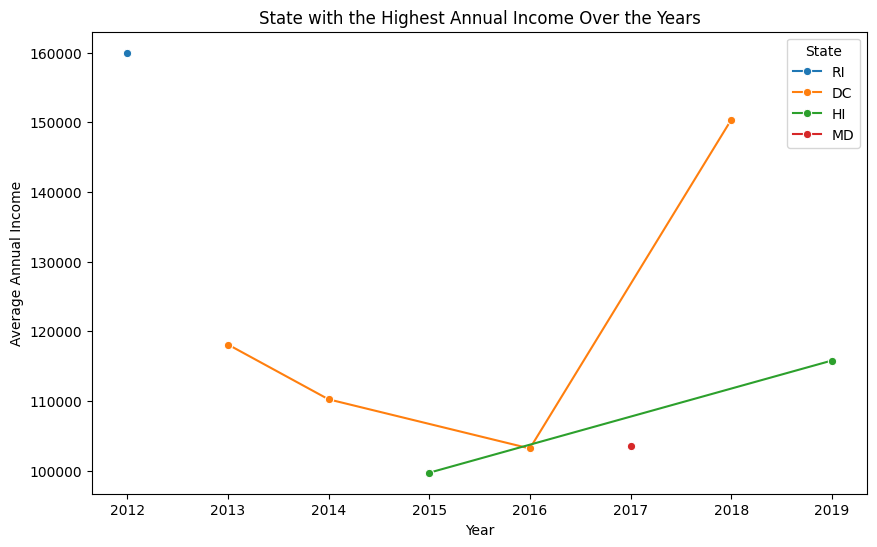

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fintech['issue_date'] = pd.to_datetime(fintech['issue_date'])

# Step 1: Extract the year from 'issue_date' and create a new column for decades
fintech['year'] = fintech['issue_date'].dt.year

# Group the years into decades (e.g., 2000-2009, 2010-2019, etc.)
fintech['decade'] = (fintech['year'] // 1) 

# Group by state and year, then calculate the average annual income
income_by_state_year = fintech.groupby(['addr_state', fintech['issue_date'].dt.year])['annual_inc'].mean().reset_index()

# Find the state with the highest average income each year
top_income_states = income_by_state_year.groupby('issue_date').apply(lambda x: x[x['annual_inc'] == x['annual_inc'].max()])

# Plot the average income for the state with the highest income each year
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_income_states, x='issue_date', y='annual_inc', hue='addr_state', marker='o')

plt.title('State with the Highest Annual Income Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Annual Income')
plt.legend(title='State')
plt.show()


Income trends differ greatly by state, with some states like DC experiencing a sharp recovery after a decline, while others like Hawaii show consistent growth.


Rhode Island had an exceptionally high average annual income in 2012 but did not maintain its top position in later years.

## How does the Average Annual Income behaves Over years

C:\Users\User\AppData\Local\Temp\ipykernel_10132\2184562490.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


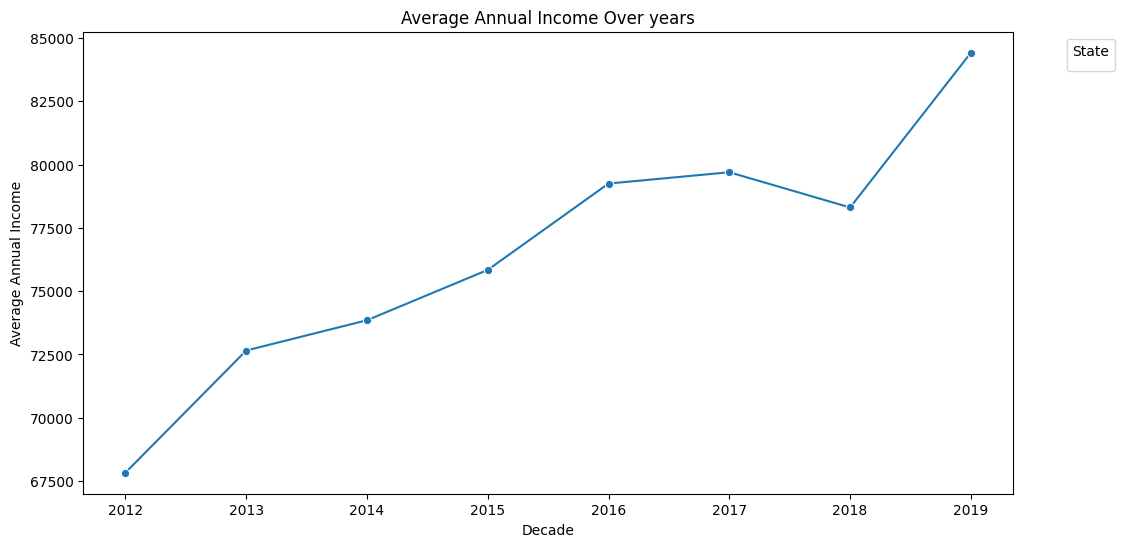

In [4]:
import pandas as pd

# Ensure the 'issue_date' is in datetime format
fintech['issue_date'] = pd.to_datetime(fintech['issue_date'])

# Step 1: Extract the year from 'issue_date' and create a new column for decades
fintech['year'] = fintech['issue_date'].dt.year

# Group the years into decades (e.g., 2000-2009, 2010-2019, etc.)
fintech['decade'] = (fintech['year'] // 1) 

# Step 2: Group by 'city' (or 'state') and 'decade', then calculate the average income
avg_income_by_decade_city = fintech.groupby([ 'decade'])['annual_inc'].mean().reset_index()

# Step 3: Visualize the average income over decades for each state
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x='decade', y='annual_inc',  data=avg_income_by_decade_city, marker='o')
plt.title('Average Annual Income Over years')
plt.xlabel('Decade')
plt.ylabel('Average Annual Income')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


the data suggests a general upward trend in average annual income over time, with occasional dips.

# How do interest rates vary with loan grades, loan amounts, and income levels?

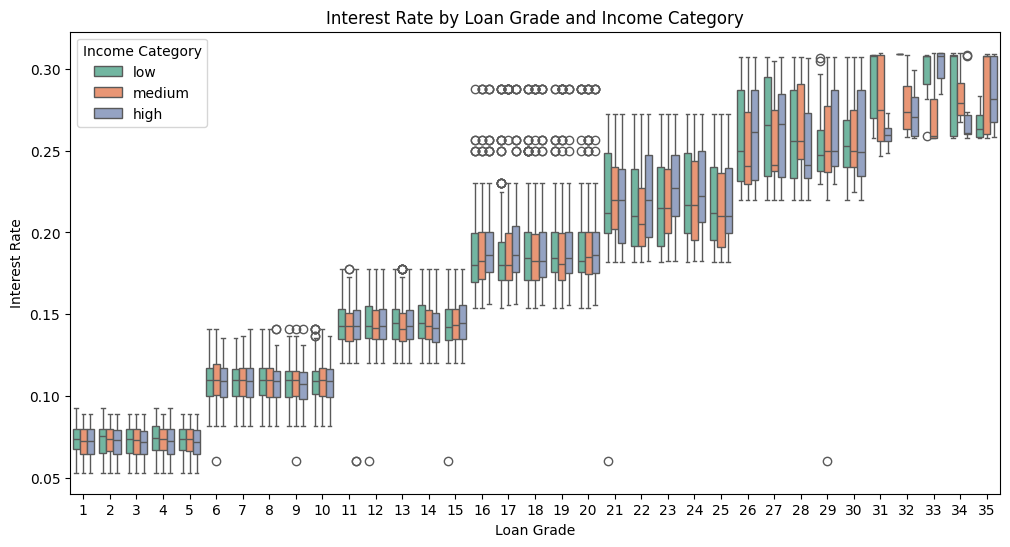

In [5]:
import seaborn as sns

# Create income categories (low, medium, high) for better analysis
fintech['income_category'] = pd.qcut(fintech['annual_inc'], 3, labels=['low', 'medium', 'high'])

# Plot interest rate vs loan grade, split by income levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='int_rate', hue='income_category', data=fintech, palette='Set2')
plt.title('Interest Rate by Loan Grade and Income Category')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.legend(title='Income Category')
plt.show()


The plot shows that interest rates increase with higher loan grades, indicating riskier loans have higher rates. Across all loan grades, income levels (low, medium, high) have little effect on the interest rates, as the rates for all income categories follow similar patterns. There is greater variability in interest rates for higher loan grades, while lower grades show more consistent rates.

# Do people with different home ownership and income levels have different loan statuses?


C:\Users\User\AppData\Local\Temp\ipykernel_10132\3149774899.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_status_by_home_income = fintech.groupby(['home_ownership', 'income_category', 'loan_status']).size().unstack()


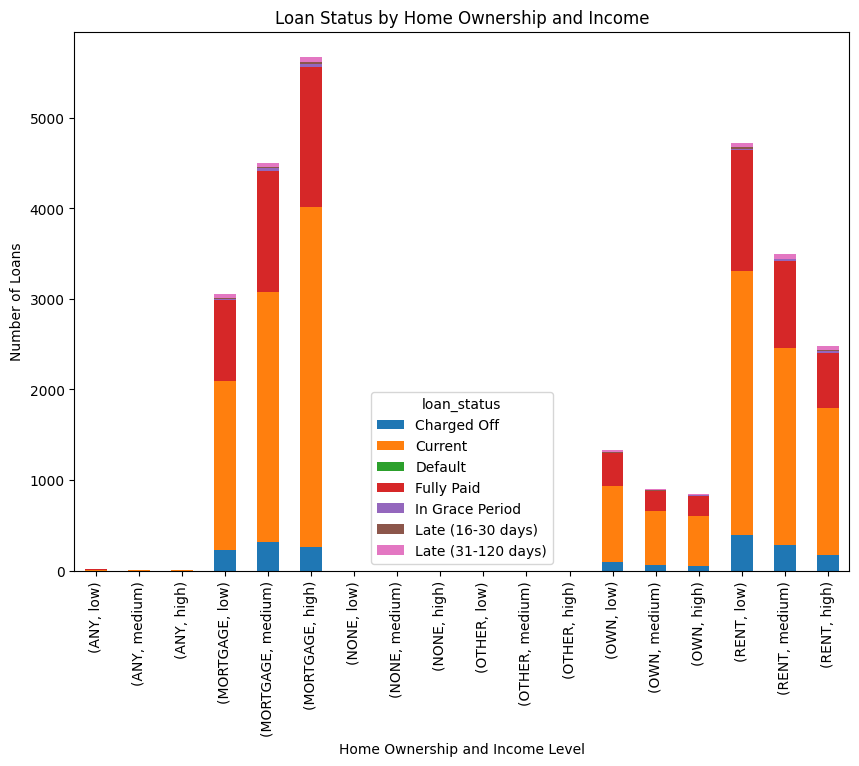

In [6]:
# Create income categories (low, medium, high)
fintech['income_category'] = pd.qcut(fintech['annual_inc'], 3, labels=['low', 'medium', 'high'])

# Group the data by home_ownership, income_category, and loan_status
loan_status_by_home_income = fintech.groupby(['home_ownership', 'income_category', 'loan_status']).size().unstack()

# Plot a grouped bar plot
loan_status_by_home_income.plot(kind='bar', stacked=True, figsize=(10, 7), title='Loan Status by Home Ownership and Income')
plt.xlabel('Home Ownership and Income Level')
plt.ylabel('Number of Loans')
plt.show()


Income and home ownership have a strong correlation with loan performance. High-income individuals with mortgages tend to have better loan repayment histories (current or fully paid), while low-income renters are more likely to have charged-off or defaulted loans, showing higher financial instability.


This plot highlights how financial risk is concentrated among low-income renters, while high-income mortgage holders show much better loan repayment performance.

# Does employment length impact the loan interest rate?


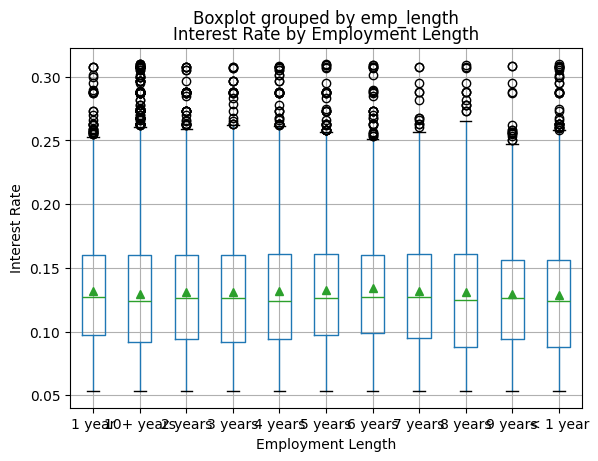

In [7]:
fintech.boxplot(column='int_rate', by='emp_length', grid=True, showmeans=True)
plt.title('Interest Rate by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate')
plt.show()


There doesn't seem to be a strong correlation between employment length and loan interest rate, as the median and range of interest rates remain similar across different employment lengths. Other factors are likely to play a more significant role in determining the interest rate.

# Which state has the highest number of loans, and what is the average loan amount or annual income in that state?


C:\Users\User\AppData\Local\Temp\ipykernel_10132\3225689406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_loan_data, x='addr_state', y='loan_count', palette='Blues', ax=ax)


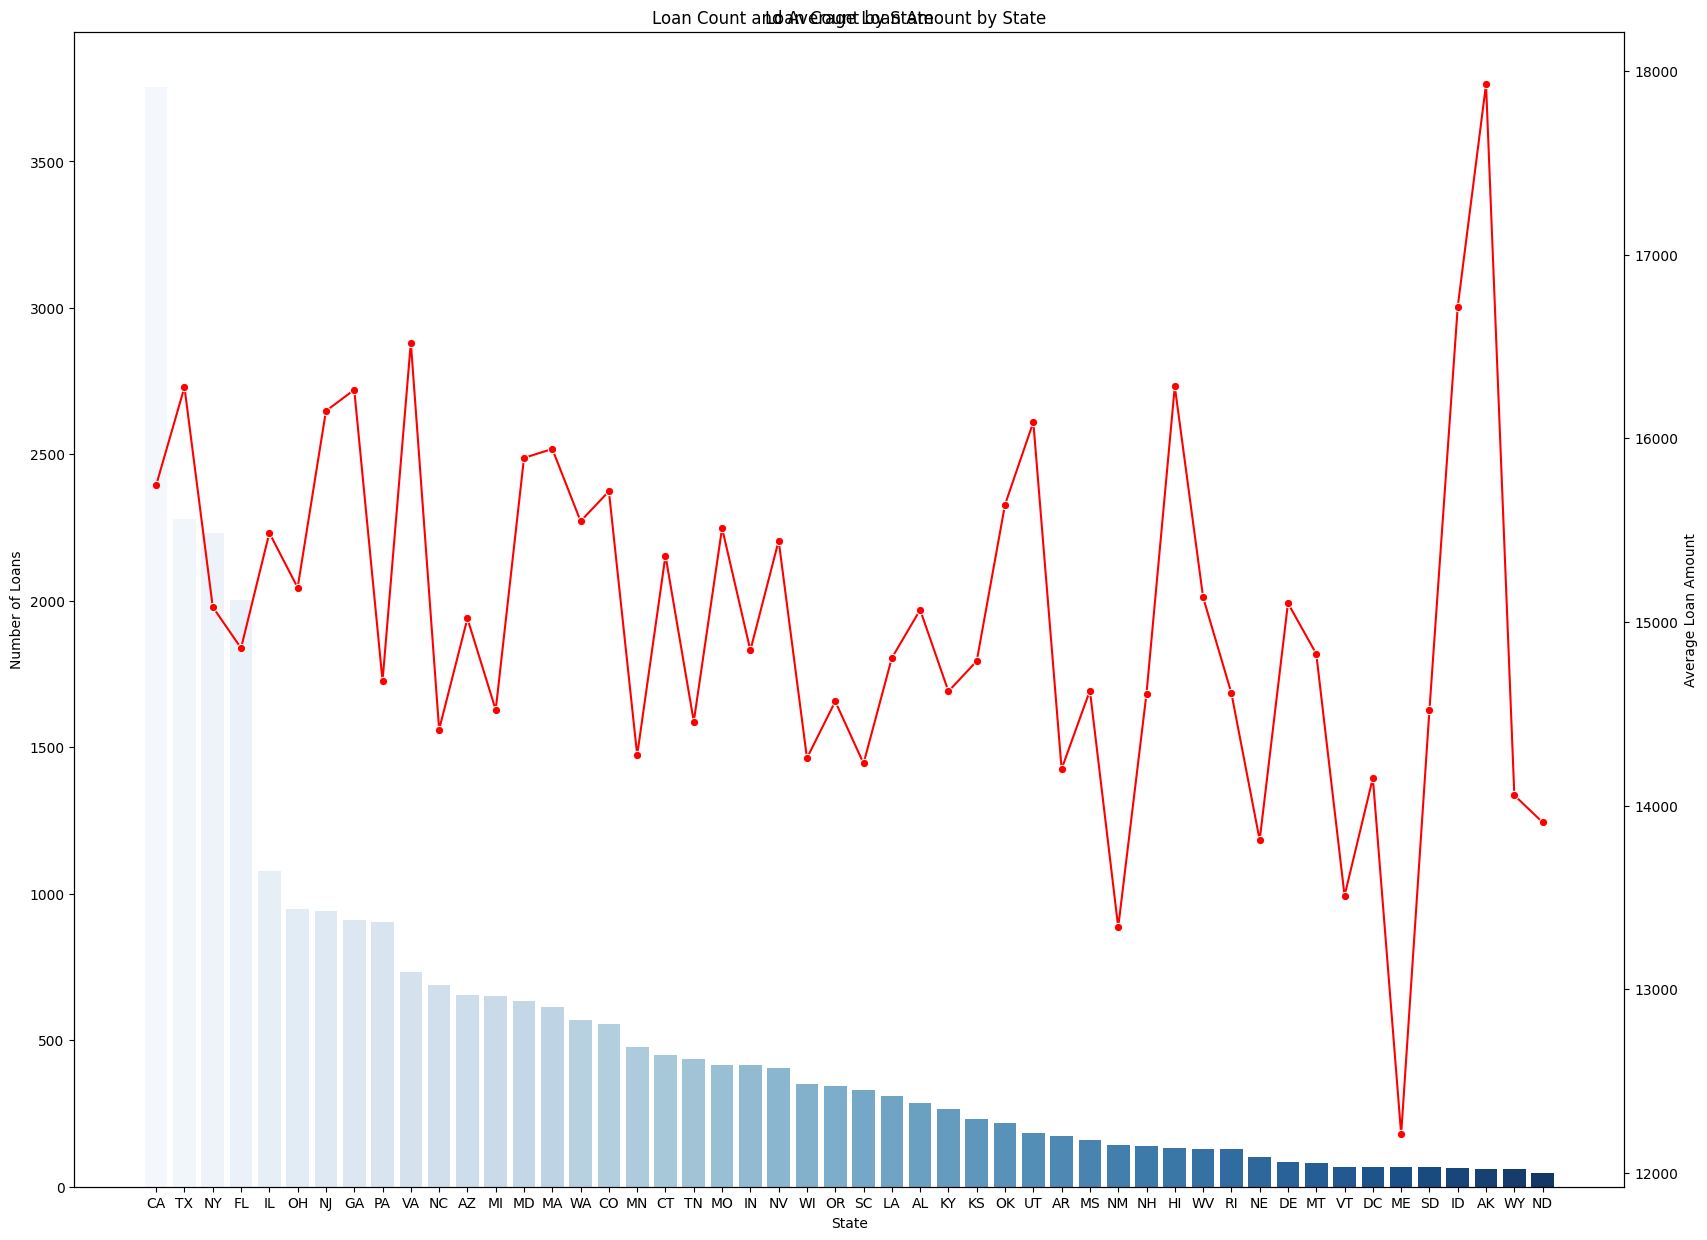

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by state and get count of loans and average loan amount
state_loan_data = fintech.groupby('addr_state').agg(
    loan_count=('loan_id', 'count'),
    avg_loan_amount=('loan_amount', 'mean')
).reset_index()

# Sort by the number of loans
state_loan_data = state_loan_data.sort_values(by='loan_count', ascending=False)

# Plot the results
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(data=state_loan_data, x='addr_state', y='loan_count', palette='Blues', ax=ax)
ax.set_title('Loan Count by State')
ax.set_ylabel('Number of Loans')
ax.set_xlabel('State')

# Adding a line plot for the average loan amount on the same graph
ax2 = ax.twinx()
sns.lineplot(data=state_loan_data, x='addr_state', y='avg_loan_amount', ax=ax2, color='r', marker="o")
ax2.set_ylabel('Average Loan Amount')
ax2.set_title('Loan Count and Average Loan Amount by State')

plt.show()


The chart shows that states like California, Texas, and New York have the highest number of loans, but the average loan amount varies significantly across states. Smaller states like Alaska and Wyoming have fewer loans but higher average loan amounts, indicating an inverse relationship between the number of loans and loan amounts in some states.








# "How does the interest rate vary across different loan purposes and income categories?"



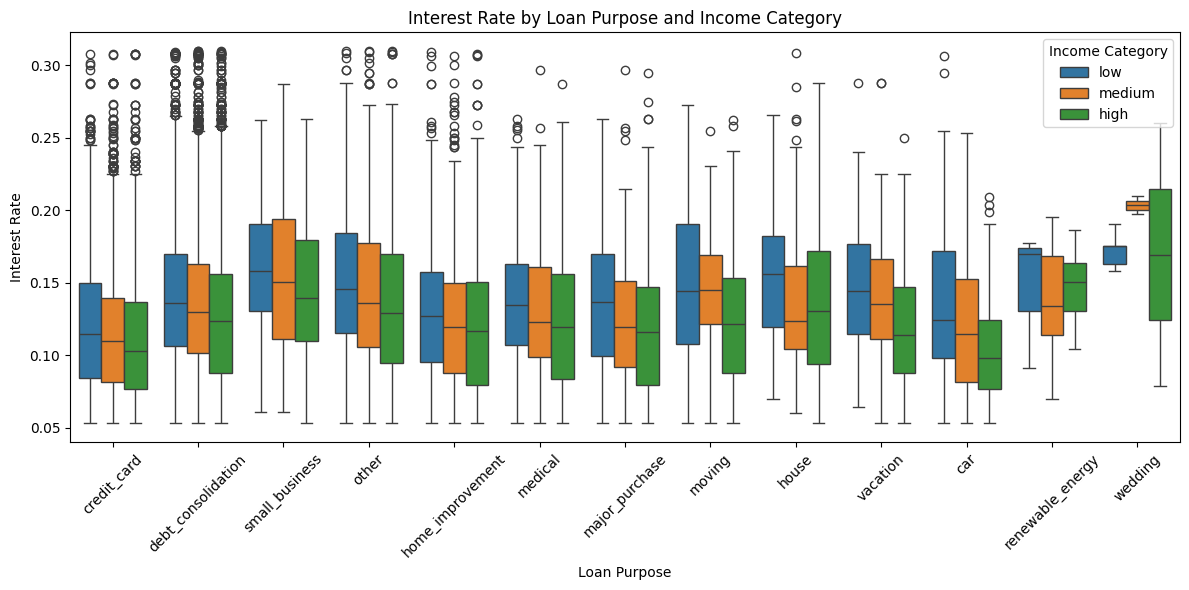

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

# Create the boxplot grouped by 'purpose' and color-coded by 'income_category'
sns.boxplot(x='purpose', y='int_rate', hue='income_category', data=fintech)

# Customize plot
plt.title('Interest Rate by Loan Purpose and Income Category')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Income Category')

# Display the plot
plt.tight_layout()
plt.show()


This plot suggests that both the purpose of the loan and the borrower's income level influence the interest rates, with certain loan types attracting higher interest across all income groups.

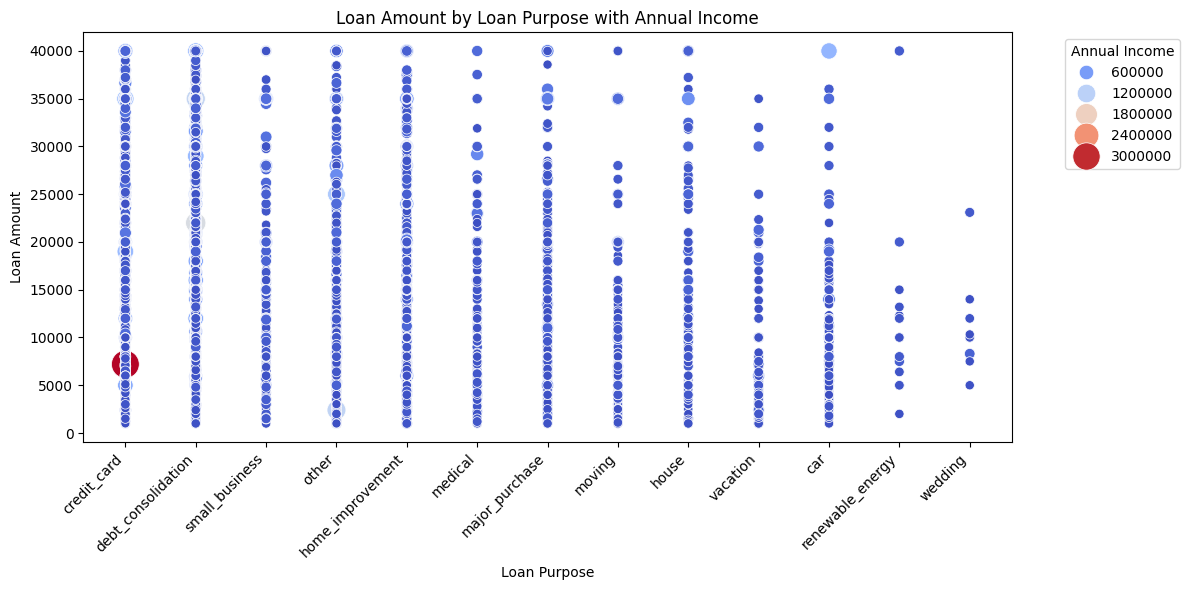

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot where loan amount is on y-axis, loan purpose on x-axis, and color by annual income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='purpose', y='loan_amount', hue='annual_inc', data=fintech, palette='coolwarm', size='annual_inc', sizes=(40, 400))

plt.xticks(rotation=45, ha='right')
plt.title('Loan Amount by Loan Purpose with Annual Income')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Purpose')
plt.legend(title="Annual Income", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The observations indicate that loan purpose plays a significant role in determining the loan amount, but annual income does not have a clear direct impact on the loan size for specific purposes. For example, even individuals with higher incomes may take out smaller loans for purposes like vacations or car purchases, while larger loans are often taken for small businesses and major purchases regardless of income level. This suggests that loan amount is more closely related to the purpose of the loan rather than the borrower's income level, and that people across all income brackets tend to borrow for similar purposes.

# 3 - Cleaning Data

## Tidying up column names and setting index

In [11]:
fintech.columns = fintech.columns.str.lower().str.replace(' ', '_')
fintech.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description', 'year',
       'decade', 'income_category'],
      dtype='object')

In [12]:
fintech_indexed=fintech.set_index("customer_id")
fintech_indexed.head()

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,year,decade,income_category
customer_id,,,,,,,,,,,,,,,,,,,,,
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx4YjQuWHhceGM2U01ceGU1Qlx4YjRWSXZceGQyblx4MWViXHhiZmZceDAzXHhmZSc=,Tech. Trainer 2,10+ years,MORTGAGE,51000.0,NaN,Not Verified,275xx,NC,9245.0,55470.0,...,0.0532,2,2015-08-15,False,Individual,credit_card,Credit card refinancing,2015,2015,low
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU1XHg4Y1x4OGNceGFlXlx4YTZceGRlXHg5Nlx4ZmVxZCNVXHhiYXlVXHhmN1x4YTFceGQ3XHhjOVx4ZThceGUyXHhmZic=,lab ast.,10+ years,MORTGAGE,55000.0,NaN,Not Verified,958xx,CA,34367.0,240569.0,...,0.1199,7,2014-01-14,False,INDIVIDUAL,debt_consolidation,Debt consolidation,2014,2014,medium
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMElfPmJceGE5XHgxN1x4OTNceGY3XHg4M1x4MWNceDFkPytceGZhR3xceGNmXHhiNFx4ODhceDAzXHhlNyc=,AW2 Advocate,< 1 year,RENT,69900.0,NaN,Verified,967xx,HI,7786.0,116784.0,...,0.1075,9,2016-02-16,False,INDIVIDUAL,debt_consolidation,NaN,2016,2016,medium
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn58XHhmY1x4ZGZhXHhmYnRceDE1XHgxMGwtXHgxZlx4YWFceDBiXHgxNi8gXHhiNjtceGMwXHhjNyc=,NaN,NaN,MORTGAGE,25000.0,129000.0,Verified,335xx,FL,10832.0,184142.0,...,0.2000,20,2019-04-19,False,Joint App,credit_card,Credit card refinancing,2019,2019,low
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJceGMwXHgwM2ssYlx4YTdceGY1P1x4YmJcclx4ZDRMKVx4YmMqXHhmZmRceGNmXHgwY1x4ODQn,NaN,< 1 year,RENT,100000.0,NaN,Not Verified,337xx,FL,6471.0,32357.0,...,0.0881,4,2019-08-19,False,Individual,credit_card,Credit card refinancing,2019,2019,high


## Observe inconsistent data

observing duplicates 

In [13]:
duplicates=fintech_indexed[fintech_indexed.duplicated()]
duplicates



# there doesnt exist duplicates 

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,year,decade,income_category
customer_id,,,,,,,,,,,,,,,,,,,,,


Observing the inConsistent data in columns

In [14]:
fintech_indexed['type'].unique()

array(['Individual', 'INDIVIDUAL', 'Joint App', 'JOINT', 'DIRECT_PAY'],
      dtype=object)

In [15]:
# Replace values in the 'type' column
fintech_indexed['type'].replace({
    'INDIVIDUAL': 'Individual', 
    'JOINT': 'Joint App'
}, inplace=True)

# Confirm the changes
print(fintech_indexed['type'].unique())

['Individual' 'Joint App' 'DIRECT_PAY']


C:\Users\User\AppData\Local\Temp\ipykernel_10132\1024035854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fintech_indexed['type'].replace({


In [16]:
fintech_indexed['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype=object)

In [17]:
fintech_indexed['emp_length'].unique()


array(['10+ years', '< 1 year', nan, '2 years', '3 years', '5 years',
       '1 year', '7 years', '9 years', '6 years', '4 years', '8 years'],
      dtype=object)

In [18]:
# List of categorical columns to check for consistency
categorical_columns = ['home_ownership', 'verification_status', 'loan_status', 'grade', 'purpose',]

# Loop through and print unique values for each column
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(fintech_indexed[col].unique())
    print("\n")


Unique values in 'home_ownership':
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER' 'NONE']


Unique values in 'verification_status':
['Not Verified' 'Verified' 'Source Verified']


Unique values in 'loan_status':
['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (16-30 days)' 'Late (31-120 days)' 'Default']


Unique values in 'grade':
[ 2  7  9 20  4 24  5  8  3 17  1 11 19 14 15  6 30 13 23 18 12 10 16 29
 21 25 22 27 34 28 26 33 31 35 32]


Unique values in 'purpose':
['credit_card' 'debt_consolidation' 'small_business' 'other'
 'home_improvement' 'medical' 'major_purchase' 'moving' 'house' 'vacation'
 'car' 'renewable_energy' 'wedding']




## Findings and conclusions

` there exist only incosistent data in the Type column and its handling by replacing capital words by small letter word`

## Observing Missing Data

In [19]:
missing= fintech_indexed.isnull().mean()*100
missing

emp_title               8.964114
emp_length              7.180910
home_ownership          0.000000
annual_inc              0.000000
annual_inc_joint       93.214946
verification_status     0.000000
zip_code                0.000000
addr_state              0.000000
avg_cur_bal             0.000000
tot_cur_bal             0.000000
loan_id                 0.000000
loan_status             0.000000
loan_amount             0.000000
state                   0.000000
funded_amount           0.000000
term                    0.000000
int_rate                4.661487
grade                   0.000000
issue_date              0.000000
pymnt_plan              0.000000
type                    0.000000
purpose                 0.000000
description             0.947096
year                    0.000000
decade                  0.000000
income_category         0.000000
dtype: float64

## Handling Missing data

CREATING A LOOKUP TABLE TO TRACK CHANGES


In [20]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize an empty DataFrame to store the lookup table
lookup_table = pd.DataFrame(columns=['Feature', 'Original Value', 'Imputed/Encoded Value'])

# Function to track imputations or encodings
def track_changes(feature, original_value, imputed_value):
    global lookup_table
    new_row = pd.DataFrame({'Feature': [feature], 'Original Value': [original_value], 'Imputed/Encoded Value': [imputed_value]})
    lookup_table = pd.concat([lookup_table, new_row], ignore_index=True)


`handling missing int rate`

In [21]:
# Investigate correlation of  missing int_rate with loan status
print(fintech_indexed.groupby('loan_status')['int_rate'].apply(lambda x: x.isnull().sum()))



loan_status
Charged Off            96
Current               790
Default                 0
Fully Paid            342
In Grace Period         6
Late (16-30 days)       6
Late (31-120 days)     20
Name: int_rate, dtype: int64


"i think that thhe int rate mising values are Missing at Random (MAR) which may be  tied to the fact that loans with certain statuses haven't fully processed or finalized their interest rates."

So we could impute it  using the mean value for each Loan Status group

In [22]:
fintech_indexed.groupby('loan_status')['int_rate'].agg(
  missing_values=lambda x: x.isnull().sum(),
  mean_rate='mean'
)


,missing_values,mean_rate
loan_status,,
Charged Off,96,0.158319
Current,790,0.128031
Default,0,0.210400
Fully Paid,342,0.127688
In Grace Period,6,0.157107
Late (16-30 days),6,0.157488
Late (31-120 days),20,0.161835


In [ ]:
fintech_indexed['rate_imputed'] = fintech_indexed.groupby('loan_status')['int_rate'].transform(lambda x: x.fillna(x.mean()))
fintech_indexed['rate_imputed'].isnull().sum()

0

`annual income joint`

In [24]:
fintech_indexed.groupby('type')['annual_inc_joint'].agg(
  missing_values=lambda x: x.isnull().sum()
)


,missing_values
type,
DIRECT_PAY,36
Individual,25160
Joint App,0


For the annual income joint  its MNAR Since the annual_inc_joint column doesn't apply to individual or Direct pay  loans, it makes sense that these values are missing so it will be imputed to be zero for the individual and direct pay  loan types

In [25]:

fintech_indexed['annual_inc_joint_imputed'] = fintech_indexed.groupby('loan_status')['annual_inc_joint'].transform(lambda x: x.fillna(0))
fintech_indexed['annual_inc_joint_imputed'].isnull().sum()

track_changes('annual_inc_joint', 'missing', "0")



`missing vaues in Description column`

The missing values in the description column are likely Missing at Random (MAR). This assumption is based on the observation that users may have skipped providing a description because they felt it was redundant, as they had already specified the purpose of the loan as most of the purpse values and description values has the same meaning



In [26]:
# Step 1: Extract the first word from both 'description' and 'purpose'
fintech_indexed['first_word_description'] = fintech_indexed['description'].str.lower().str.replace(' ', '_')  # First word of 'description'
fintech_indexed['first_word_purpose'] = fintech_indexed['purpose'].str.split().str[0].str.lower()  # First word of 'purpose'

fintech_indexed['first_word_purpose'] = fintech_indexed['purpose'].str.split('_').str[0]# First word of 'purpose'
fintech_indexed['first_word_description1'] = fintech_indexed['first_word_description'].str.split('_').str[0]
fintech_indexed['first_word_purpose']

#Step 2: Compare the first words
first_word_matches = fintech_indexed['first_word_description1'] == fintech_indexed['first_word_purpose']

# Step 3: Count the number of matches and the percentage of matches
total_rows = len(fintech_indexed)
num_first_word_matches = first_word_matches.sum()+ 0.0094*total_rows


percent_first_word_matches = (num_first_word_matches / total_rows) * 100

# Print the results
print(f'Number of first word matches: {num_first_word_matches}')
print(f'Percentage of first word matches between purpose and description: {percent_first_word_matches:.2f}%')

# Clean


Number of first word matches: 25727.082
Percentage of first word matches between purpose and description: 95.18%


`Matching Analysis Between Purpose and Description:`

Upon analyzing the two columns:

[95%] Match: The first words of the purpose and description columns match in 95% of the cases. This indicates that when a description is provided, it often closely mirrors the loan purpose.
Given this strong similarity, it is reasonable to impute the missing description values by simply using the corresponding value from the purpose column.

In [27]:
# Step 1: Standardize 'Description ' (e.g., convert to lowercase)
fintech_indexed['description'] = fintech_indexed['description'].str.lower().str.replace(' ', '_')

# Step 2: Impute missing 'description' with  'purpose'
fintech_indexed['description'] = fintech_indexed['description'].fillna(fintech_indexed['purpose'])
print(fintech_indexed['description'].isnull().sum())


0


`emp title missing values`

In [28]:
# Group by 'emp_title' and calculate the average 'Annual Inc'
pd.options.display.float_format='{:,.2f}'.format

avg_income_by_title = fintech_indexed.groupby('emp_title')['annual_inc'].mean().sort_values(ascending=False)
print(avg_income_by_title)


emp_title
Harris C, Siskind, P.A.   1,300,000.00
Hilo driver               1,260,000.00
Cage Cashier              1,059,912.47
Orthropedic Surgeon       1,000,000.00
EXECUTIVE DIRECTOR          651,000.00
                              ...     
Assistant Teacher             8,000.00
Hydro Vac Driver              8,000.00
Garden associate              4,000.00
After School Day Care         4,000.00
Seamstress                    2,500.00
Name: annual_inc, Length: 13239, dtype: float64


In [29]:
# Group by 'emp_title', 'Home Ownership', and 'Addr State', then calculate average 'Annual Inc' and 'Loan Amount'
grouped_data = fintech_indexed.groupby(['emp_title', 'home_ownership']).agg({
    'annual_inc': 'mean',
    'loan_amount': 'mean'
}).sort_values(by='annual_inc', ascending=False)
grouped_data


,,annual_inc,loan_amount
emp_title,home_ownership,,
Cage Cashier,RENT,"1,575,267.20","8,600.00"
"Harris C, Siskind, P.A.",MORTGAGE,"1,300,000.00","35,000.00"
Hilo driver,MORTGAGE,"1,260,000.00","2,400.00"
Orthropedic Surgeon,MORTGAGE,"1,000,000.00","35,000.00"
Doctor,OWN,"900,000.00","29,000.00"
...,...,...,...
Hydro Vac Driver,RENT,"8,000.00","8,450.00"
Assistant Teacher,MORTGAGE,"8,000.00","20,000.00"
Garden associate,MORTGAGE,"4,000.00","4,800.00"


In [30]:
fintech_indexed.groupby('state')['emp_title'].agg(
  missing_values=lambda x: x.isnull().sum(),
#   mean_rate='mean'
)


#seems like it doesnt have any realation witht the state

,missing_values
state,
AK,4
AL,27
AR,23
AZ,75
CA,337
CO,43
CT,30
DC,7
DE,11


`we can try to categorize the annual income to high low and medium and see the missing values relative to it`

In [31]:
# Step 1: Categorize 'Annual Inc' into low, medium, and high income groups
# Using quantiles to create the income categories
income_bins = pd.qcut(fintech_indexed['annual_inc'], q=3, labels=['q1', 'q2', 'q3'])

# Step 2: Add the income category to the DataFrame
fintech_indexed['income_category'] = income_bins

# Step 3: Create a column to indicate missing 'emp_title'
fintech_indexed['emp_title_missing'] = fintech_indexed['emp_title'].isnull()

# Step 4: Group by 'income_category' and 'emp_title_missing' to see the relationship
# missing_by_income_category = fintech_indexed.groupby(['income_category', 'emp_title_missing']).size().unstack()
# print(missing_by_income_category)

fintech_indexed.groupby('income_category')['emp_title'].agg(
  missing_values=lambda x: x.isnull().sum(),
)


# Step 5: Visualize the missing values relative to income categories
# import seaborn as sns
# import matplotlib.pyplot as plt

# Visualizing the count of missing and non-missing 'emp_title' across income categories
# sns.countplot(x='income_category', hue='emp_title_missing', data=fintech_indexed)
# plt.title('Missing emp_title by Income Category')
# plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10132\4041335460.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fintech_indexed.groupby('income_category')['emp_title'].agg(


,missing_values
income_category,
q1,1424
q2,581
q3,418


most of the missing values in emp_title are concentrated in the Low income category so this may lead to an `MAR `since most employees with low income dont like to reveal their job title 

We could impute it by the mode of each category

In [32]:
# Step 1: Calculate the mode (most frequent job title) for each income category
mode_low = fintech_indexed[fintech_indexed['income_category'] == 'q1']['emp_title'].mode()[0]
mode_medium = fintech_indexed[fintech_indexed['income_category'] == 'q2']['emp_title'].mode()[0]
mode_high = fintech_indexed[fintech_indexed['income_category'] == 'q3']['emp_title'].mode()[0]

# Step 2: Create a mapping dictionary with modes for each category
mode_mapping = {
    'q1': mode_low,
    'q2': mode_medium,
    'q3': mode_high
}

# Step 3: Use fillna() to impute missing 'emp_title' values based on the income category
fintech_indexed['emp_title'] = fintech_indexed.apply(
    lambda row: row['emp_title'] if pd.notnull(row['emp_title']) else mode_mapping[row['income_category']],
    axis=1
)

# Step 4: Verify if missing values have been filled
fintech_indexed['emp_title'].isnull().sum()  # Should return 0 if all missing values have been imputed


0

#  handling missing emp length 

In [33]:
# investigatin whether theer is a direct relation between the missing values and the home ownership
fintech_indexed.groupby('home_ownership')['emp_length'].agg(
  missing_values=lambda x: x.isnull().sum()
)

,missing_values
home_ownership,
ANY,6
MORTGAGE,867
NONE,0
OTHER,0
OWN,402
RENT,666


 seems there is no direct relation between the home ownerhsip as even people who own homes didnt record emp length
 

I  made a  column for categorizing the grades in letters to be able to compare its relation with missing values 

In [34]:
# Step 1: Define a function to categorize loan grades based on the numeric range
def categorize_grade(numeric_value):
    if 1 <= numeric_value <= 5:
        return 'A'
    elif 6 <= numeric_value <= 10:
        return 'B'
    elif 11 <= numeric_value <= 15:
        return 'C'
    elif 16 <= numeric_value <= 20:
        return 'D'
    elif 21 <= numeric_value <= 25:
        return 'E'
    elif 26 <= numeric_value <= 30:
        return 'F'
    elif 31 <= numeric_value <= 35:
        return 'G'
    else:
        return 'Unknown'  # In case the value doesn't fall in any of these ranges

# Step 2: Apply the function to categorize the numeric grade
fintech_indexed['grade_category'] = fintech_indexed['grade'].apply(categorize_grade)

# Step 3: Verify the categorization
fintech_indexed['grade_category'].unique()


array(['A', 'B', 'D', 'E', 'C', 'F', 'G'], dtype=object)

investigating  whether there is a relation ship betwen the missing values and the grade category


In [35]:

fintech_indexed.groupby(['grade_category'])['emp_length'].agg(
  missing_values=lambda x: x.isnull().sum()
)

# it seems missing records are distrubted among the A,B,C and D grade

,missing_values
grade_category,
A,423
B,573
C,525
D,310
E,80
F,22
G,8


In [36]:
# investigatin whether there is a relation ship betwen the missing values and the loan amount by categorizing it to low high and medium
loan_bins = pd.qcut(fintech_indexed['loan_amount'], q=3, labels=['low', 'medium', 'high'])

# Add the income category to the DataFrame
fintech_indexed['loan_category'] = loan_bins
fintech_indexed.groupby('loan_category')['emp_length'].agg(
  missing_values=lambda x: x.isnull().sum()
)

C:\Users\User\AppData\Local\Temp\ipykernel_10132\3586720843.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fintech_indexed.groupby('loan_category')['emp_length'].agg(


,missing_values
loan_category,
low,1066
medium,482
high,393


It seems that Individuals with fewer years of employment are more likely to fall into the "low loan" category. but this still isn't a reasoning of the missing data


In [37]:


fintech_indexed.groupby(['income_category','loan_category'])['emp_length'].agg(
  missing_values=lambda x: x.isnull().sum()
)


C:\Users\User\AppData\Local\Temp\ipykernel_10132\1039584784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fintech_indexed.groupby(['income_category','loan_category'])['emp_length'].agg(


missing_values
income_category loan_category                
q1              low                       859
                medium                    286
                high                      121
q2              low                       160
                medium                    141
                high                      167
q3              low                        47
                medium                     55
                high                      105

Since the missing values in emp_length don’t appear to be systematically related to other columns (such as salary, job title, or loan amount), we assume they are completely random.`MCAR` and will be handled by the Mode

In [38]:
# Step 1: Find the mode of 'emp_length'
emp_length_mode = fintech_indexed['emp_length'].mode()[0]

# Step 2: Impute missing 'emp_length' with the mode
fintech_indexed['emp_length_imputed']=fintech_indexed['emp_length']
fintech_indexed['emp_length_imputed'].fillna(emp_length_mode, inplace=True)
track_changes('emp_length', 'missing', fintech_indexed['emp_length'].mode()[0]+ "(mode)")


# Display the result to check
print(fintech_indexed['emp_length_imputed'].isnull().sum())  


0


C:\Users\User\AppData\Local\Temp\ipykernel_10132\3459242617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fintech_indexed['emp_length_imputed'].fillna(emp_length_mode, inplace=True)


In [39]:
lookup_table

,Feature,Original Value,Imputed/Encoded Value
0,annual_inc_joint,missing,0
1,emp_length,missing,10+ years(mode)


## Observing outliers

In [40]:
# we will make a copy of the indexed data set
fintech_out=fintech.set_index("customer_id")
fintech_out.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'year', 'decade',
       'income_category'],
      dtype='object')

# First We observe the outliers by plotting the histogram of each numerical value to consider which detecting mwthod to use


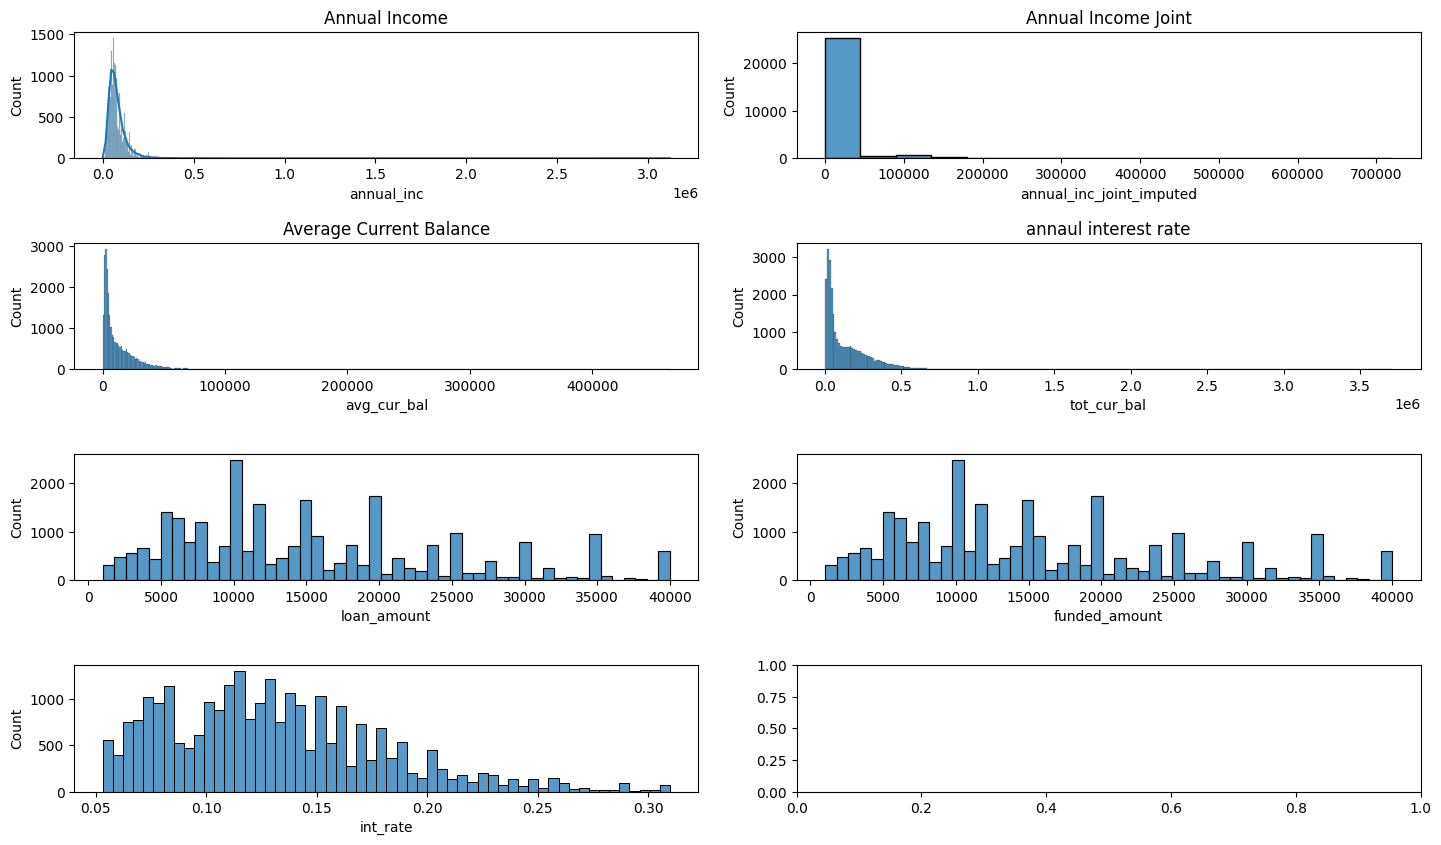

In [41]:


# Set up the figure and axes for a grid of plots
fig, axes = plt.subplots(4, 2, figsize=(15, 9))
plt.tight_layout(pad=4.0)

# Plot 1: Annual Income
sns.histplot(fintech_out['annual_inc'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Annual Income')

# Plot 2: Annual Income Joint
sns.histplot(fintech_indexed['annual_inc_joint_imputed'], kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Joint')

# Plot 3: Average Current Balance
sns.histplot(fintech_out['avg_cur_bal'], kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Average Current Balance')

# Plot 4: Total Current Balance
sns.histplot(fintech_out['tot_cur_bal'], kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Total Current Balance')


# Plot 5: loan amount
sns.histplot(fintech_out['loan_amount'], kde=False, ax=axes[2, 0])
axes[1, 1].set_title('Loan Amount')


# Plot 6: Funded amount
sns.histplot(fintech_out['funded_amount'], kde=False, ax=axes[2, 1])
axes[1, 1].set_title('Funded amount')

# Plot 7: interest rate
sns.histplot(fintech_out['int_rate'], kde=False, ax=axes[3, 0])
axes[1, 1].set_title('annaul interest rate')

# Display the plots
plt.show()


# Explanation of Each Plot:
`Annual Income :`
Observation: The distribution of annual income is highly right-skewed, with most values concentrated at lower income levels

Outlier Handling: Due to the significant skewness, the IQR method is recommended


`Annual Income Joint :`
Observation: The distribution of joint annual income is less skewed compared to individual annual income, but still exhibits some right-skewness.

Outlier Handling: Iqr is more appropriate  


`Average Current Balance :`
Observation: The average current balance is highly right-skewed, with a large number of low balance values and a few extreme high values.

Outlier Handling: The IQR method should be used to handle outliers due to the skewed distribution


`Total Current Balance :`
Observation: The distribution of total current balance is also right-skewed, similar to average current balance

Outlier Handling: IQR

`Loan Amount:`
Observation: The loan amount distribution has some spikes at common loan amounts  but overall is not heavily skewed. It’s relatively balanced.

Outlier Handling: The Z-score method could be used here since the distribution is closer to normal.


`Funded Amount :`
Observation: The funded amount has a similar distribution to the loan amount 

Outlier Handling:Z-score 


`Interest Rate :`
Observation: The interest rate distribution shows a somewhat left-skewed pattern, but not extreme

Outlier Handling:  this distribution is more centered so the Z-score method can be used 



##  Detecting and Handling outliers

# annaul income


In [42]:
Q1_annualInc = fintech_out['annual_inc'].quantile(0.25)
Q3_annualInc = fintech_out['annual_inc'].quantile(0.75)
IQR = Q3_annualInc - Q1_annualInc

print(f'Q1: {Q1_annualInc:.3f}, Q3: {Q3_annualInc:.3f}, IQR: {IQR:.3f}')
print(fintech_out['annual_inc'].max())
print(fintech_out['annual_inc'].min())


Q1: 47000.000, Q3: 95000.000, IQR: 48000.000
3120208.0
200.0


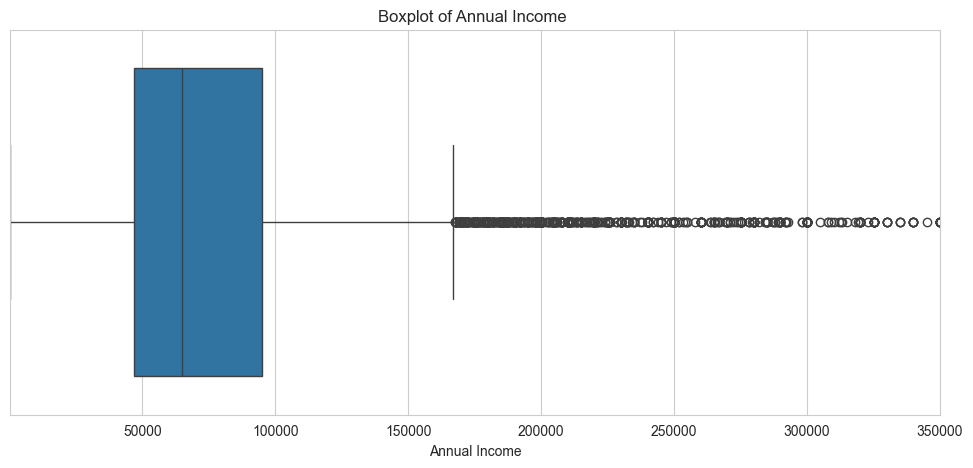

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and style
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')

# Boxplot with adjusted y-axis limits to zoom in on the majority of the data
sns.boxplot(x=fintech_out['annual_inc'])

# Zoom in to focus on the majority of the data (exclude extreme outliers for readability)
plt.xlim(200, 350000)  # Adjust the limits to focus on relevant data points

plt.xlabel('Annual Income')
plt.title('Boxplot of Annual Income ')
plt.show()


Trying log transform to handle outliers

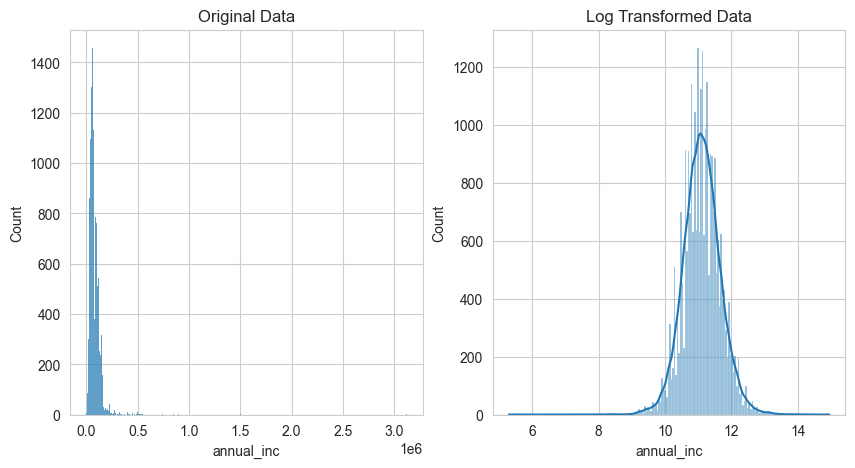

In [44]:
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_annual = np.log(fintech_out['annual_inc'])

sns.histplot(fintech_out['annual_inc'],ax=ax[0], kde=False)
ax[0].set_title('Original Data');

sns.histplot(log_annual ,  ax=ax[1] ,kde=True);
ax[1].set_title('Log Transformed Data');



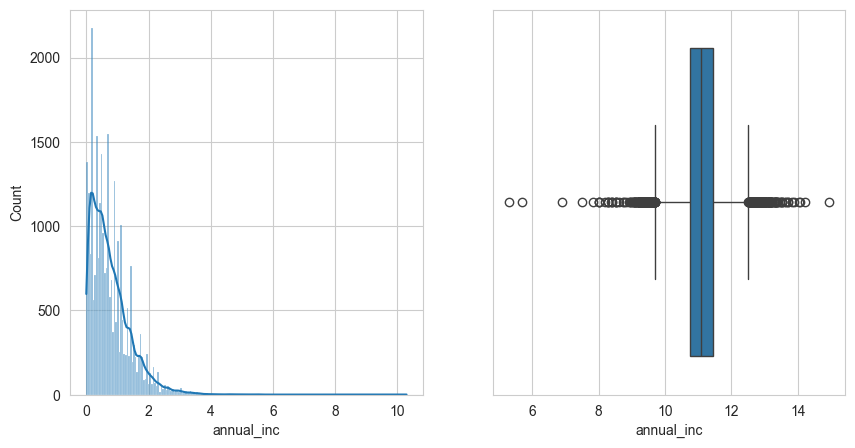

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

log_tips_z = np.abs((log_annual - log_annual.mean()) / log_annual.std())
sns.histplot(log_tips_z, kde=True, ax=ax[0]);

sns.boxplot(x=log_annual, ax=ax[1]);

since we still have outliers  after applying the log transform we will do  lower and upper capping


In [46]:
fintech_out['annual_log']=log_annual
Q1_annualInc = fintech_out['annual_log'].quantile(0.25)
Q3_annualInc = fintech_out['annual_log'].quantile(0.75)
IQR = Q3_annualInc - Q1_annualInc
lower_bound_annual_inc = Q1_annualInc - 1.5 * IQR
upper_bound_annual_inc = Q3_annualInc + 1.5 * IQR
q95_annual = fintech_out['annual_log'].quantile(0.95)
q05_annual = fintech_out['annual_log'].quantile(0.05)


print(f'q05 {q05_annual}')
print(f'q95 {q95_annual}')
print(f'upper_bound_annual_inc: {upper_bound_annual_inc}')
print(f'lower_bound_annual_inc: {lower_bound_annual_inc}')
print(f'min value in income: {fintech_out["annual_log"].min()}')
print(f'max value in income: {fintech_out["annual_log"].max()}')




q05 10.20672044741378
q95 12.037653993905211
upper_bound_annual_inc: 12.517226105418402
lower_bound_annual_inc: 9.702308945856473
min value in income: 5.298317366548036
max value in income: 14.953410224230208


In [47]:
# Apply capping for the 'annual_log' column
fintech_out['annual_log_capped'] = fintech_out['annual_log'].apply(
    lambda x: upper_bound_annual_inc if x > upper_bound_annual_inc else (lower_bound_annual_inc if x < lower_bound_annual_inc else x)
)

# Display the result with capped values
print(fintech_out[['annual_log', 'annual_log_capped']].describe())
fintech_indexed['annual_log_capped']=fintech_out['annual_log_capped']
sns.boxplot(x=fintech_out['annual_log_capped'], ax=ax[0]);

       annual_log  annual_log_capped
count   27,030.00          27,030.00
mean        11.11              11.11
std          0.56               0.54
min          5.30               9.70
25%         10.76              10.76
50%         11.08              11.08
75%         11.46              11.46
max         14.95              12.52


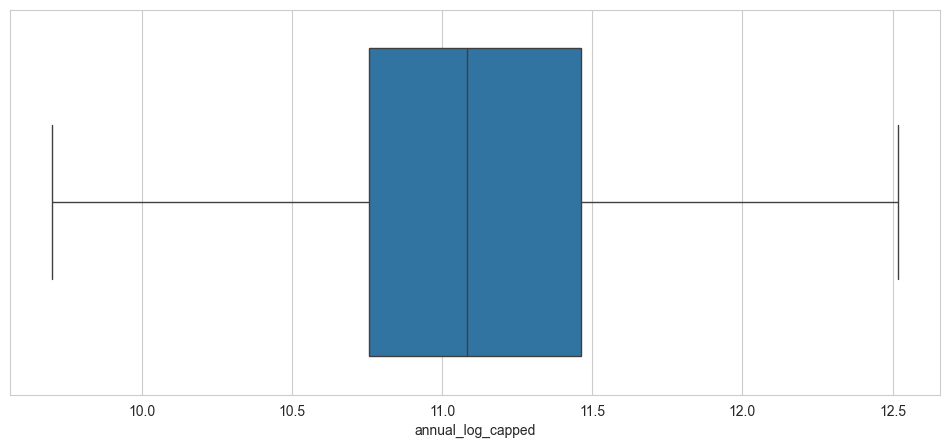

In [48]:
plt.figure(figsize=(12, 5))

sns.boxplot(x=fintech_out['annual_log_capped']);

# Annual income joint`


In [49]:
#fintech_out['annual_inc_joint']=fintech_indexed['annual_inc_joint_imputed']
Q1_annualIncj = fintech_out['annual_inc_joint'].quantile(0.25)
Q3_annualIncj = fintech_out['annual_inc_joint'].quantile(0.95)
IQR = Q3_annualIncj - Q1_annualIncj

print(f'Q1: {Q1_annualIncj:.3f}, Q3: {Q3_annualIncj:.3f}, IQR: {IQR:.3f}')
print(fintech_out['annual_inc_joint'].max())
print(fintech_out['annual_inc_joint'].min())


Q1: 88000.000, Q3: 255000.000, IQR: 167000.000
720000.0
17200.0


In [50]:
fintech_out['annual_inc_joint'].value_counts()

annual_inc_joint
100,000.00    39
130,000.00    29
90,000.00     28
80,000.00     28
115,000.00    28
              ..
132,500.00     1
25,118.00      1
223,680.00     1
63,500.00      1
80,442.00      1
Name: count, Length: 664, dtype: int64

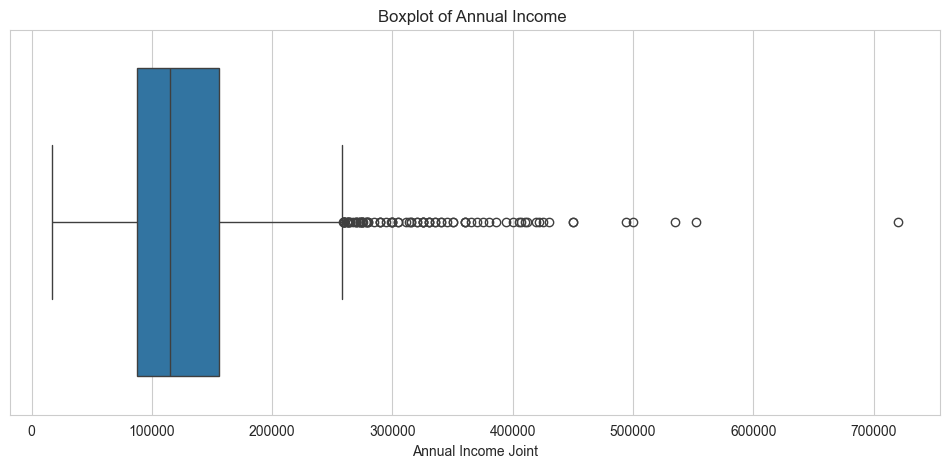

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and style
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')

# Boxplot with adjusted y-axis limits to zoom in on the majority of the data
sns.boxplot(x=fintech_out['annual_inc_joint'])

# Zoom in to focus on the majority of the data (exclude extreme outliers for readability)
#plt.xlim(0, 350000)  # Adjust the limits to focus on relevant data points

plt.xlabel('Annual Income Joint')
plt.title('Boxplot of Annual Income ')
plt.show()


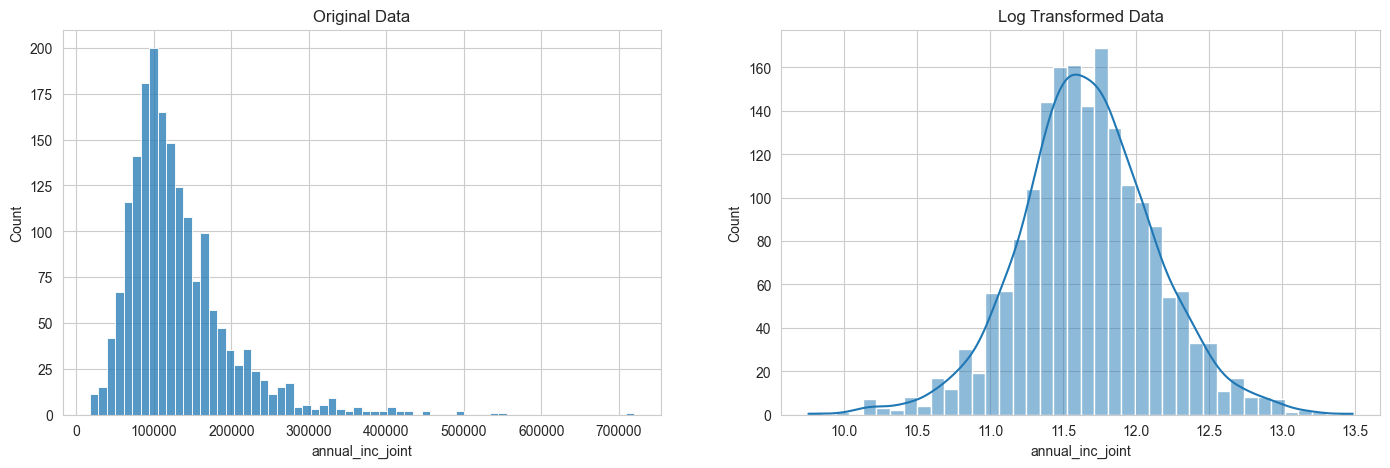

In [52]:
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(17, 5))


log_annualj = np.log(fintech_out['annual_inc_joint'])

sns.histplot(fintech_out['annual_inc_joint'],ax=ax[0], kde=False)
ax[0].set_title('Original Data');

sns.histplot(log_annualj ,  ax=ax[1] ,kde=True);
ax[1].set_title('Log Transformed Data');



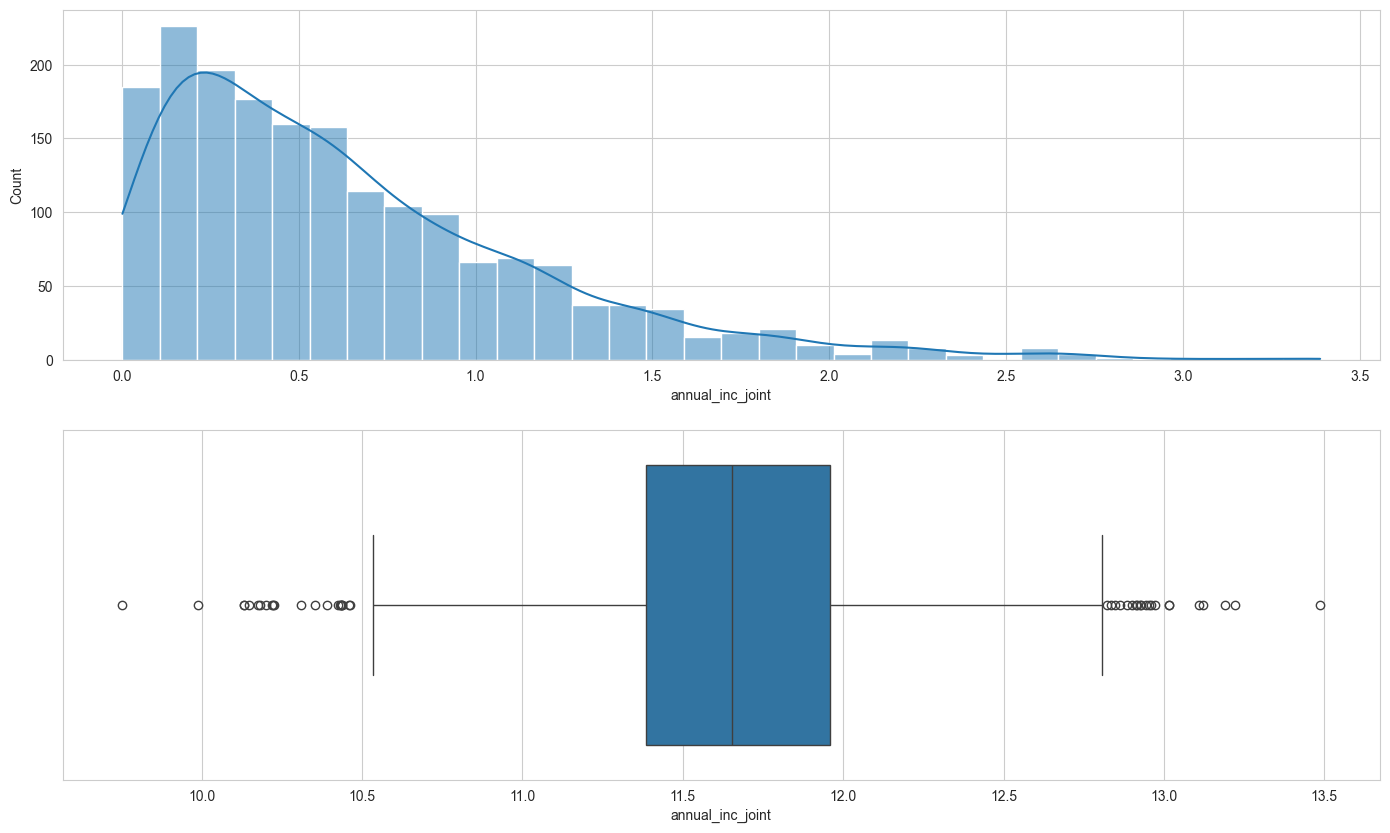

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(17, 10))

log_tips_z = np.abs((log_annualj - log_annualj.mean()) / log_annual.std())
sns.histplot(log_tips_z, kde=True, ax=ax[0]);

sns.boxplot(x=log_annualj, ax=ax[1]);

In [54]:
log_annualj.max()

13.487006490992238

since we still have outliers  after applying the log transform we will do  lower and upper capping


In [55]:
fintech_out['annual_logj']=log_annualj
Q1_annualInc = fintech_out['annual_logj'].quantile(0.25)
Q3_annualInc = fintech_out['annual_logj'].quantile(0.75)
IQR = Q3_annualInc - Q1_annualInc
lower_bound_annual_inc = Q1_annualInc - 1.5 * IQR
upper_bound_annual_inc = Q3_annualInc + 1.5 * IQR
q95_annual = fintech_out['annual_logj'].quantile(0.95)
q05_annual = fintech_out['annual_logj'].quantile(0.8)


print(f'q05 {q05_annual}')
print(f'q95 {q95_annual}')
print(f'upper_bound_annual_inc: {upper_bound_annual_inc}')
print(f'lower_bound_annual_inc: {lower_bound_annual_inc}')
print(f'min value in income: {fintech_out["annual_logj"].min()}')
print(f'max value in income: {fintech_out["annual_logj"].max()}')




q05 12.025749091398891
q95 12.449018824140563
upper_bound_annual_inc: 12.816390075388671
lower_bound_annual_inc: 10.526313304303347
min value in income: 9.752664662801545
max value in income: 13.487006490992238


In [56]:
# Apply capping for the 'annual_logj' column
fintech_out['annualjoint_log_capped'] = fintech_out['annual_logj'].apply(
    lambda x: upper_bound_annual_inc if x > upper_bound_annual_inc else (lower_bound_annual_inc if x < lower_bound_annual_inc else x)
)
fintech_indexed['annual_inc_joint_handled']=fintech_out['annualjoint_log_capped']
# Display the result with capped values
print(fintech_out[['annual_logj', 'annualjoint_log_capped']].describe())



       annual_logj  annualjoint_log_capped
count     1,834.00                1,834.00
mean         11.67                   11.67
std           0.47                    0.45
min           9.75                   10.53
25%          11.39                   11.39
50%          11.65                   11.65
75%          11.96                   11.96
max          13.49                   12.82


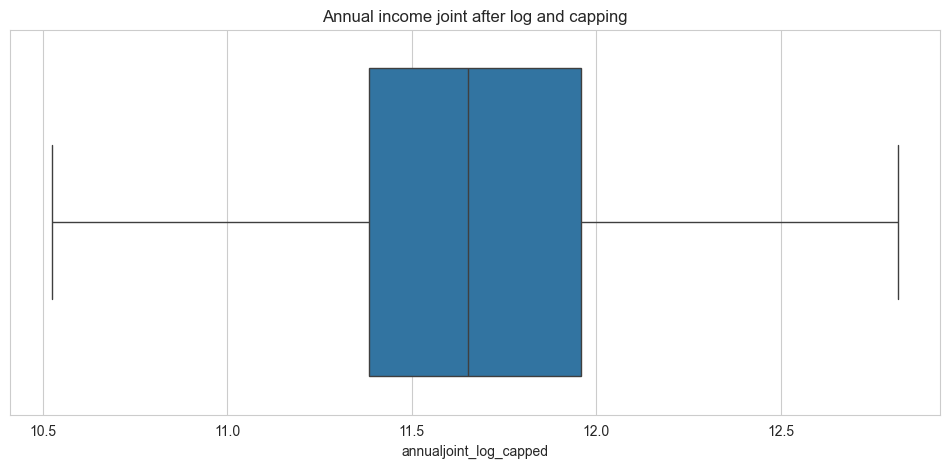

In [57]:
plt.figure(figsize=(12, 5))
plt.title('Annual income joint after log and capping')
sns.boxplot(x=fintech_out['annualjoint_log_capped']);

# Average Current Balance

In [58]:
# Step 1: Calculate IQR and check min/max values for avg_cur_bal
Q1_avg_cur_bal = fintech_out['avg_cur_bal'].quantile(0.25)
Q3_avg_cur_bal = fintech_out['avg_cur_bal'].quantile(0.75)
IQR_avg_cur_bal = Q3_avg_cur_bal - Q1_avg_cur_bal

print(f'Q1: {Q1_avg_cur_bal:.3f}, Q3: {Q3_avg_cur_bal:.3f}, IQR: {IQR_avg_cur_bal:.3f}')
print(fintech_out['avg_cur_bal'].max())
print(fintech_out['avg_cur_bal'].min())


Q1: 3050.000, Q3: 18860.000, IQR: 15810.000
463698.0
0.0


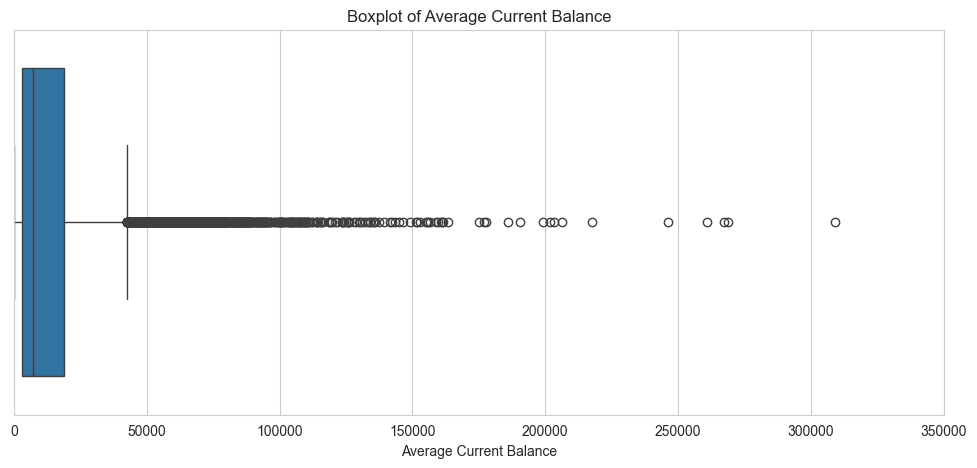

In [59]:
# Step 2: Boxplot for avg_cur_bal with adjusted limits
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')

sns.boxplot(x=fintech_out['avg_cur_bal'])

# Zoom in to focus on the majority of the data (exclude extreme outliers for readability)
plt.xlim(0, 350000)  # Adjust the limits as needed

plt.xlabel('Average Current Balance')
plt.title('Boxplot of Average Current Balance')
plt.show()

Text(0.5, 1.0, 'Log Transformed Data')

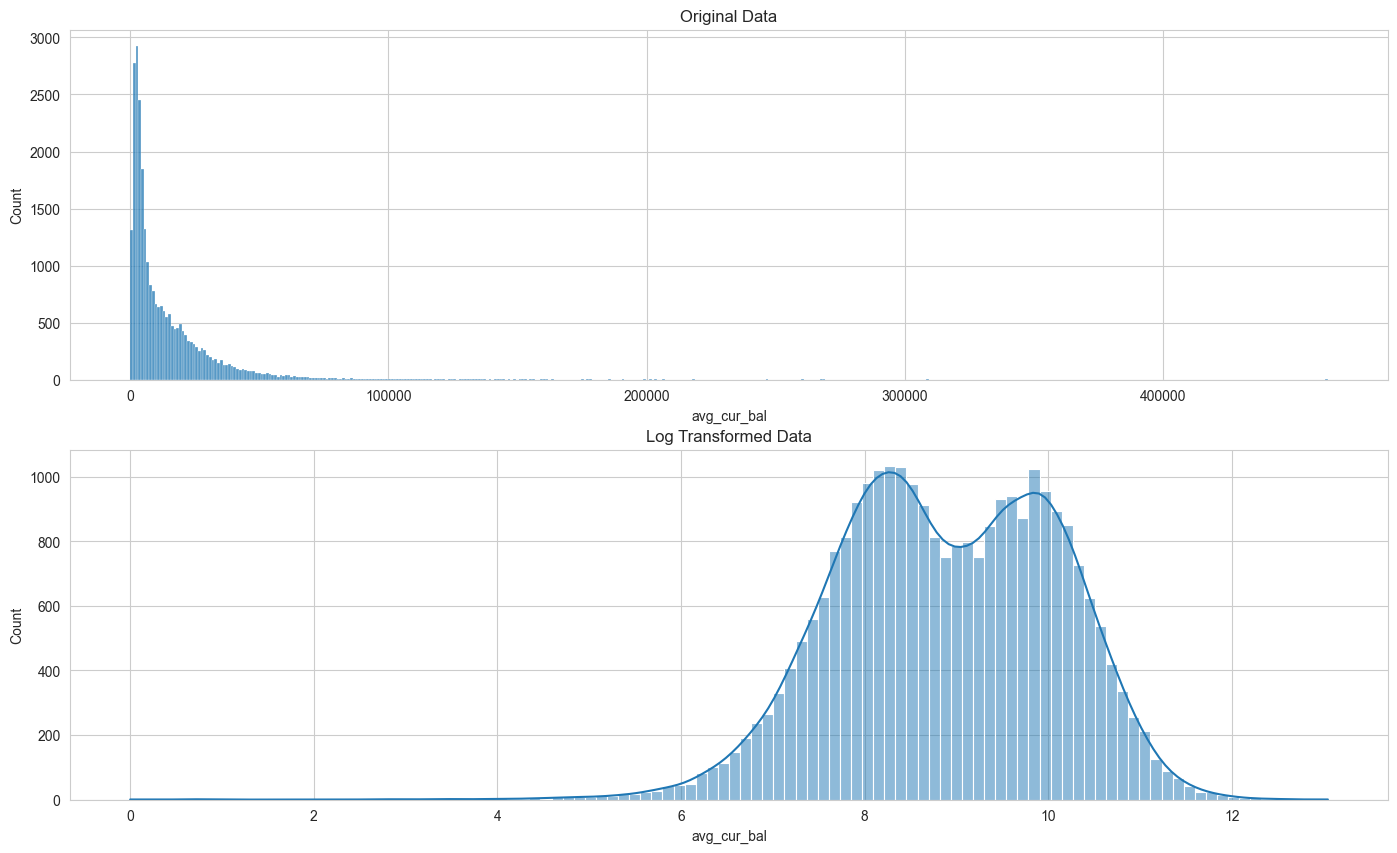

In [60]:
import numpy as np

fig, ax = plt.subplots(2,1, figsize=(17, 10))

log_avg_cur_bal = np.log(fintech_out['avg_cur_bal'] + 1)  # Adding 1 to avoid log(0)

sns.histplot(fintech_out['avg_cur_bal'], ax=ax[0], kde=False)
ax[0].set_title('Original Data')

sns.histplot(log_avg_cur_bal, ax=ax[1], kde=True)
ax[1].set_title('Log Transformed Data')

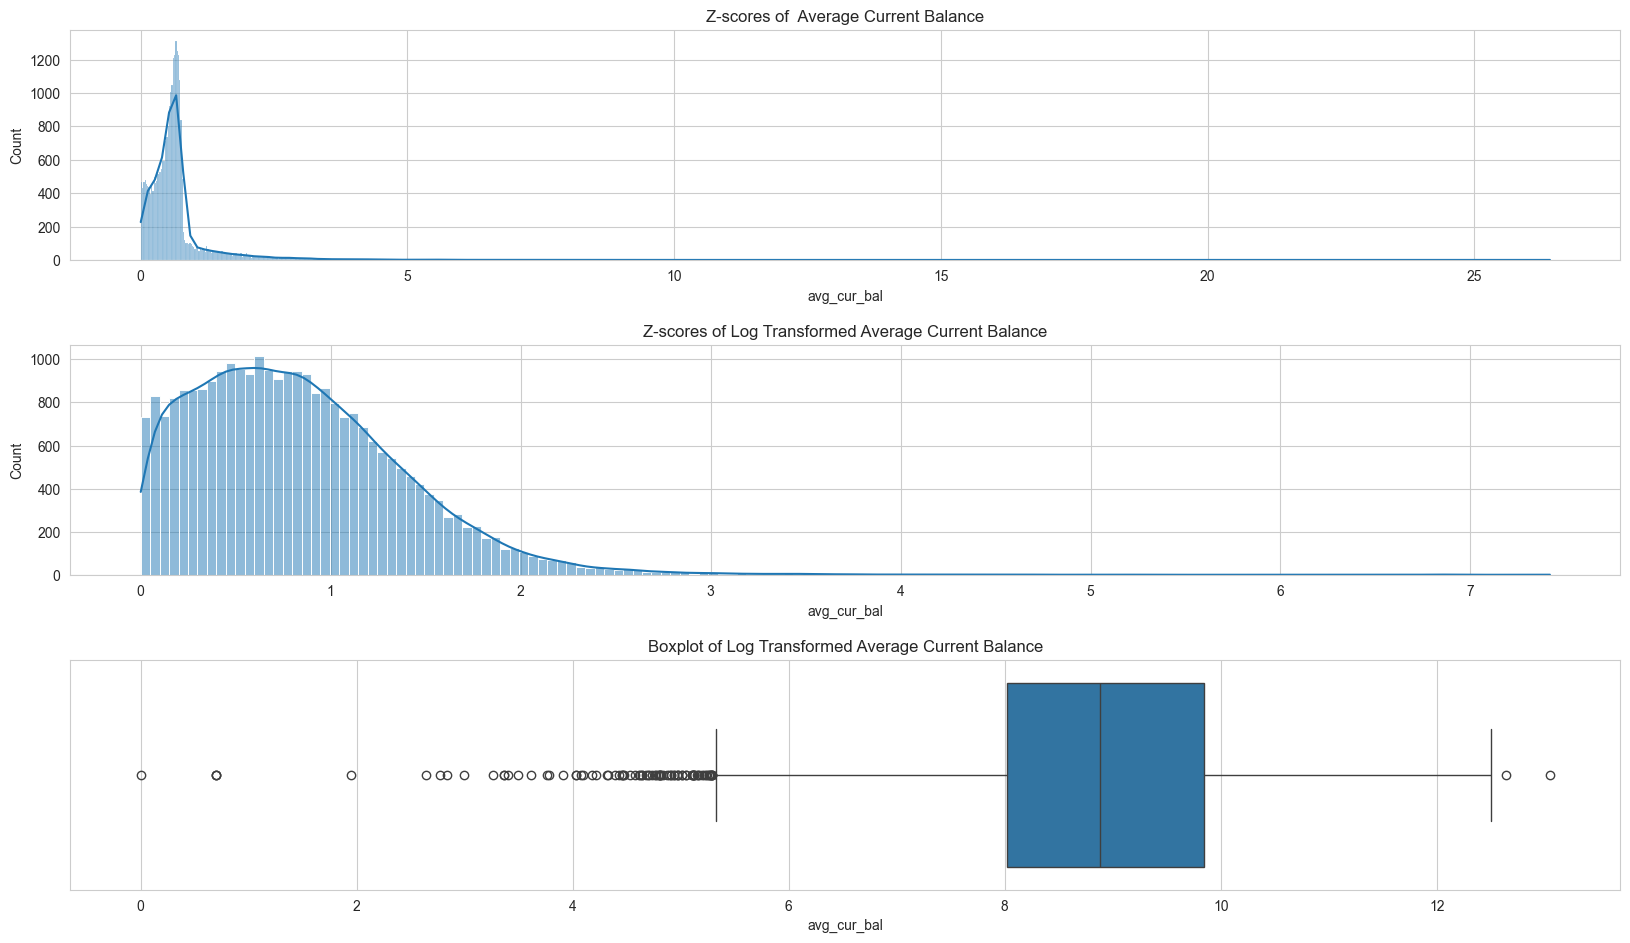

In [61]:
fig, ax = plt.subplots(3, 1, figsize=(17, 10))
plt.tight_layout(pad=4.0)


log_avg_cur_bal_z = np.abs((log_avg_cur_bal - log_avg_cur_bal.mean()) / log_avg_cur_bal.std())
avg_cur_bal_z = np.abs((fintech_out['avg_cur_bal'] - fintech_out['avg_cur_bal'].mean()) / fintech_out['avg_cur_bal'].std())


sns.histplot(avg_cur_bal_z, kde=True, ax=ax[0])
ax[0].set_title('Z-scores of  Average Current Balance')

sns.histplot(log_avg_cur_bal_z, kde=True, ax=ax[1])
ax[1].set_title('Z-scores of Log Transformed Average Current Balance')

sns.boxplot(x=log_avg_cur_bal, ax=ax[2])
ax[2].set_title('Boxplot of Log Transformed Average Current Balance')

plt.show()

Since the log transform lead to a lower outliers , we need to cap this low and high outliers

In [62]:
fintech_out['log_avg_cur_bal']=log_avg_cur_bal
Q1_annualInc = fintech_out['log_avg_cur_bal'].quantile(0.25)
Q3_annualInc = fintech_out['log_avg_cur_bal'].quantile(0.75)
IQR = Q3_annualInc - Q1_annualInc
lower_bound_annual_inc = Q1_annualInc - 1.5 * IQR
upper_bound_annual_inc = Q3_annualInc + 1.5 * IQR
q95 = fintech_out['log_avg_cur_bal'].quantile(0.95)
q05 = fintech_out['log_avg_cur_bal'].quantile(0.05)


print(f'q05 {q05_annual}')
print(f'q95 {q95_annual}')
print(f'upper_bound_annual_inc: {upper_bound_annual_inc}')
print(f'lower_bound_annual_inc: {lower_bound_annual_inc}')
print(f'min value in avg_cur_bal_logged: {fintech_out["log_avg_cur_bal"].min()}')
print(f'max value in avg_cur_bal_logged: {fintech_out["log_avg_cur_bal"].max()}')




q05 12.025749091398891
q95 12.449018824140563
upper_bound_annual_inc: 12.577291905010695
lower_bound_annual_inc: 5.290784352540255
min value in avg_cur_bal_logged: 0.0
max value in avg_cur_bal_logged: 13.04699091381048


In [63]:
# Apply capping for the 'total current balance' column
fintech_out['avg_cur_bal_capped'] = fintech_out['log_avg_cur_bal'].apply(
    lambda x: q95 if x > q95 else (q05 if x < q05 else x)
)

# Display the result with capped values
print(fintech_out[['log_avg_cur_bal', 'avg_cur_bal_capped']].describe())

       log_avg_cur_bal  avg_cur_bal_capped
count        27,030.00           27,030.00
mean              8.89                8.90
std               1.20                1.10
min               0.00                6.98
25%               8.02                8.02
50%               8.88                8.88
75%               9.84                9.84
max              13.05               10.71


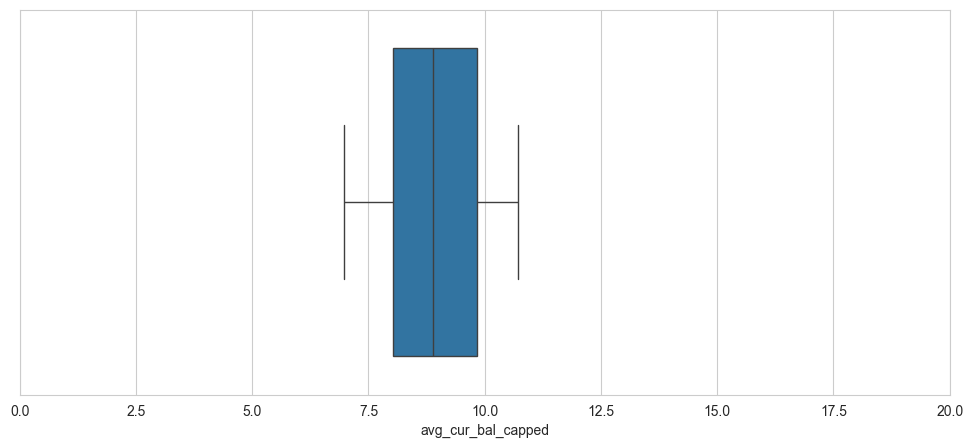

In [64]:
plt.figure(figsize=(12, 5))
plt.xlim(0,20)
fintech_indexed['avg_cur_bal_handled']=fintech_out['avg_cur_bal_capped']
sns.boxplot(x=fintech_out['avg_cur_bal_capped']);

# Total current balance

In [65]:
# Step 1: Calculate IQR and check min/max values for tot_cur_bal
Q1_tot_cur_bal = fintech_out['tot_cur_bal'].quantile(0.25)
Q3_tot_cur_bal = fintech_out['tot_cur_bal'].quantile(0.75)
IQR_tot_cur_bal = Q3_tot_cur_bal - Q1_tot_cur_bal

print(f'Q1: {Q1_tot_cur_bal:.3f}, Q3: {Q3_tot_cur_bal:.3f}, IQR: {IQR_tot_cur_bal:.3f}')
print(fintech_out['tot_cur_bal'].max())
print(fintech_out['tot_cur_bal'].min())

Q1: 29083.000, Q3: 215241.250, IQR: 186158.250
3709587.0
1.0


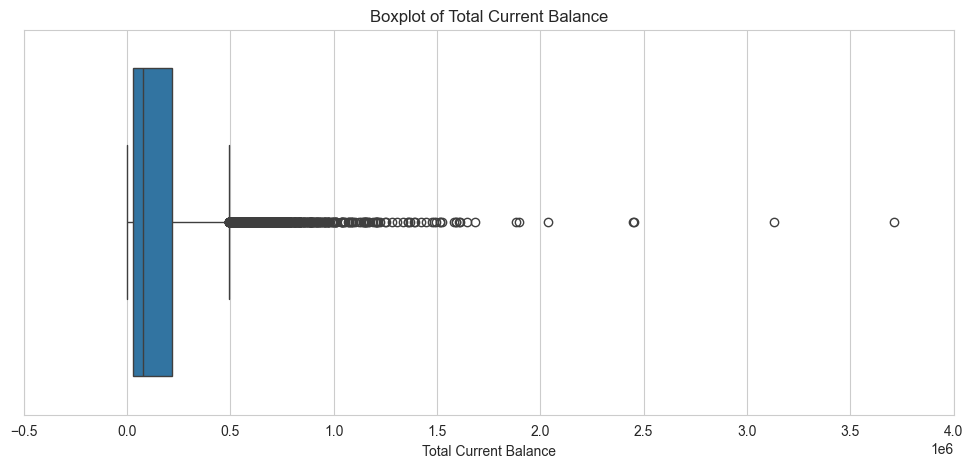

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')

sns.boxplot(x=fintech_out['tot_cur_bal'])

plt.xlim(-500000, 4000000)  

plt.xlabel('Total Current Balance')
plt.title('Boxplot of Total Current Balance')
plt.show()

Text(0.5, 1.0, 'Log Transformed Data')

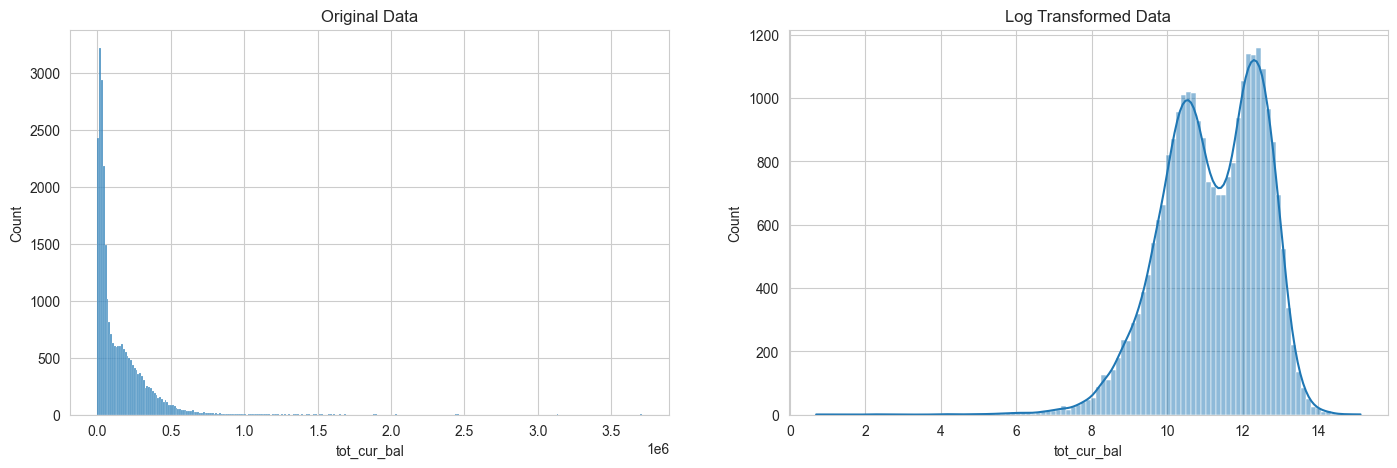

In [67]:
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(17, 5))

log_tot_cur_bal = np.log(fintech_out['tot_cur_bal'] + 1)  # Adding 1 to avoid log(0)

sns.histplot(fintech_out['tot_cur_bal'], ax=ax[0], kde=False)
ax[0].set_title('Original Data')

sns.histplot(log_tot_cur_bal, ax=ax[1], kde=True)
ax[1].set_title('Log Transformed Data')

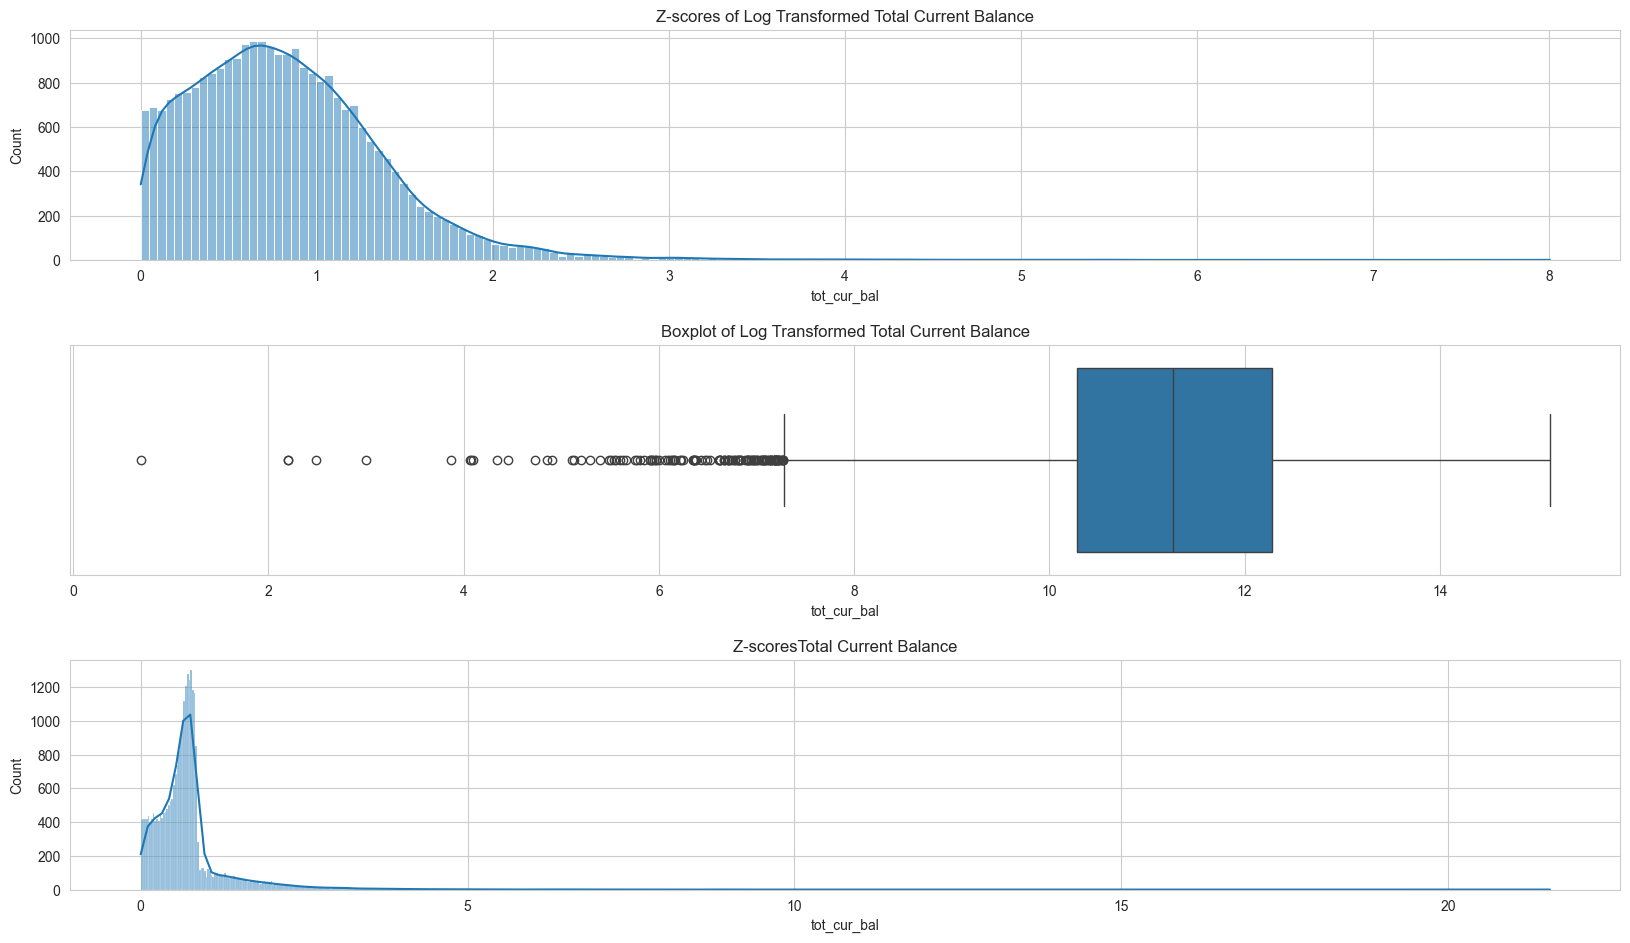

In [68]:
fig, ax = plt.subplots(3, 1, figsize=(17, 10))

plt.tight_layout(pad=4.0)

tot_cur_bal=fintech_out['tot_cur_bal']
log_tot_cur_bal_z = np.abs((log_tot_cur_bal - log_tot_cur_bal.mean()) / log_tot_cur_bal.std())
tot_cur_bal_z = np.abs((tot_cur_bal - tot_cur_bal.mean()) / tot_cur_bal.std())

sns.histplot(log_tot_cur_bal_z, kde=True, ax=ax[0])
ax[0].set_title('Z-scores of Log Transformed Total Current Balance')

sns.boxplot(x=log_tot_cur_bal, ax=ax[1])
ax[1].set_title('Boxplot of Log Transformed Total Current Balance')

sns.histplot(tot_cur_bal_z, kde=True, ax=ax[2])
ax[2].set_title('Z-scoresTotal Current Balance')

plt.show()

Since the log transform lead to a lower outliers , we need to cap this low outliers

In [69]:
fintech_out['log_tot_cur_bal']=log_tot_cur_bal
Q1_annualInc = fintech_out['log_tot_cur_bal'].quantile(0.25)
IQR = Q3_annualInc - Q1_annualInc
lower_bound_annual_inc = Q1_annualInc - 1.5 * IQR

print(f'lower_bound: {lower_bound_annual_inc}')
print(f'min value : {fintech_out["log_tot_cur_bal"].min()}')
print(f'max value : {fintech_out["log_tot_cur_bal"].max()}')




lower_bound: 10.927581320740392
min value : 0.6931471805599453
max value : 15.126431377204037


In [70]:
# Apply capping 
fintech_out['tot_cur_bal_capped'] = fintech_out['log_tot_cur_bal'].apply(
    lambda x: lower_bound_annual_inc if x < lower_bound_annual_inc else x
)

# Display the result with capped values
print(fintech_out[['log_tot_cur_bal', 'tot_cur_bal_capped']].describe())



       log_tot_cur_bal  tot_cur_bal_capped
count        27,030.00           27,030.00
mean             11.20               11.62
std               1.31                0.78
min               0.69               10.93
25%              10.28               10.93
50%              11.26               11.26
75%              12.28               12.28
max              15.13               15.13


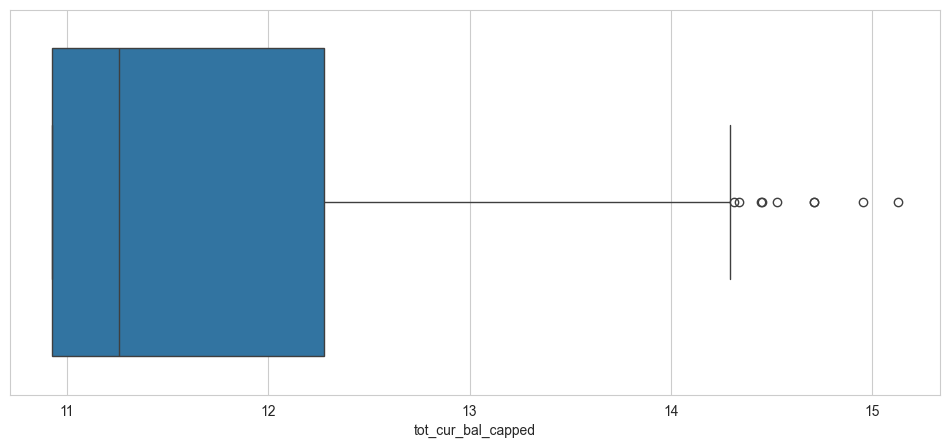

In [71]:
plt.figure(figsize=(12, 5))
fintech_indexed['tot_cur_bal_capped']=fintech_out['tot_cur_bal_capped']
sns.boxplot(x=fintech_out['tot_cur_bal_capped']);

# loan Amount

<Axes: xlabel='z_loan', ylabel='Count'>

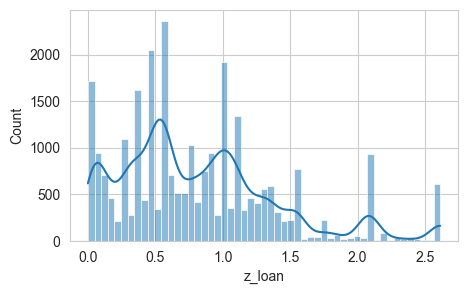

In [72]:
fintech_out['z_loan'] = np.abs((fintech_out['loan_amount'] - fintech_out['loan_amount'] .mean()) / fintech_out['loan_amount'] .std())
plt.figure(figsize=(5, 3))
sns.histplot(fintech_out['z_loan'] , kde=True)


As shown there doesnt exist a value greater than 3 or less than -3 hence there's n o outliers to handle

# Int rate

<Axes: xlabel='z_loan', ylabel='Count'>

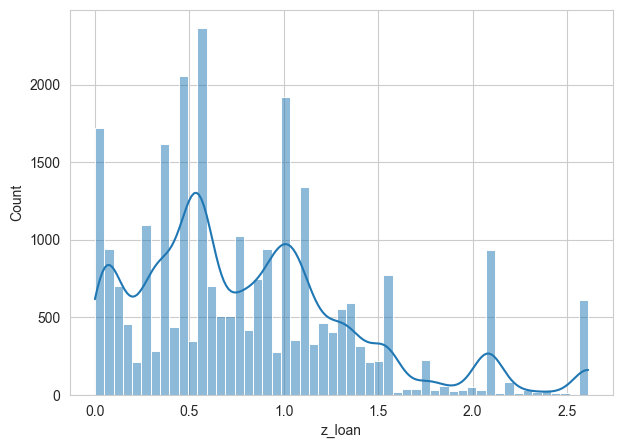

In [73]:

fintech_out['int_rate']=fintech_indexed['rate_imputed']
fintech_out['z_rate'] = np.abs((fintech_out['int_rate'] - fintech_out['int_rate'] .mean()) / fintech_out['int_rate'] .std())
plt.figure(figsize=(7, 5))
sns.histplot(fintech_out['z_loan'] , kde=True)

As shown there doesnt exist a value greater than 3 or less than -3 hence there's n o outliers to handle

# Funded amount

<Axes: xlabel='z_funded', ylabel='Count'>

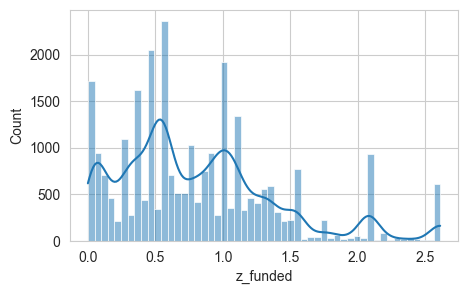

In [74]:
fintech_out['z_funded'] = np.abs((fintech_out['funded_amount'] - fintech_out['funded_amount'] .mean()) / fintech_out['funded_amount'] .std())
plt.figure(figsize=(5, 3))
sns.histplot(fintech_out['z_funded'] , kde=True)


As shown there doesnt exist a value greater than 3 or less than -3 hence there's n o outliers to handle

## Findings and conclusions

 # Summary of Outlier Handling Techniques Applied:
Annual Income, Annual Income Joint, Average Current Balance, and Total Current Balance:

Initial Approach: I used the IQR method to detect outliers due to the right-skewed distributions of these columns. Outliers identified through this method were capped.
Log Transformation: After handling the outliers with IQR, I applied a log transformation to reduce the skewness in these columns.
Post-Transformation Handling: Following the log transformation, some new low outliers appeared. These low outliers were capped to ensure that the transformed values remained within acceptable bounds.
Loan Amount, Funded Amount, and Interest Rate:

Z-score Method: For these columns, which were closer to a normal distribution, I applied the Z-score method for outlier detection.
Result: No values exceeded the Z-score thresholds (i.e., >3 or <-3), so no further actions were taken for these columns.

In [75]:
fintech_out.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'year', 'decade',
       'income_category', 'annual_log', 'annual_log_capped', 'annual_logj',
       'annualjoint_log_capped', 'log_avg_cur_bal', 'avg_cur_bal_capped',
       'log_tot_cur_bal', 'tot_cur_bal_capped', 'z_loan', 'z_rate',
       'z_funded'],
      dtype='object')

# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

`Adding month column `

 Step 1: Convert the date column to datetime format

 Step 2: Extract the month number and create a new column
 
 Display the result to check


In [76]:
import pandas as pd

# Step 1: Convert the date column to datetime format
fintech_indexed['issue_date'] = pd.to_datetime(fintech_out['issue_date'])  

# Step 2: Extract the month number and create a new column
fintech_indexed['month'] = fintech_indexed['issue_date'].dt.month

# Display the result to check
print(fintech_indexed[['issue_date', 'month']].head())


                                                   issue_date  month
customer_id                                                         
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx... 2015-08-15      8
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU... 2014-01-14      1
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMEl... 2016-02-16      2
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn5... 2019-04-19      4
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJ... 2019-08-19      8


In [77]:
fintech_indexed['month'].unique()

array([ 8,  1,  2,  4, 10,  5,  6,  3,  9, 12,  7, 11])

`Adding the Salary can cover column`
 Step 1: Create the 'salary_can_cover' column
 Step 2: Convert the boolean values to integers (True = 1, False = 0)


In [78]:
import pandas as pd

fintech_indexed['salary_can_cover'] = fintech_indexed['annual_inc'] >= fintech_indexed['loan_amount']

fintech_indexed['salary_can_cover'] = fintech_indexed['salary_can_cover'].astype(int)

fintech_indexed[['annual_inc', 'loan_amount', 'salary_can_cover']].head()


,annual_inc,loan_amount,salary_can_cover
customer_id,,,
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx4YjQuWHhceGM2U01ceGU1Qlx4YjRWSXZceGQyblx4MWViXHhiZmZceDAzXHhmZSc=,"51,000.00","18,000.00",1
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU1XHg4Y1x4OGNceGFlXlx4YTZceGRlXHg5Nlx4ZmVxZCNVXHhiYXlVXHhmN1x4YTFceGQ3XHhjOVx4ZThceGUyXHhmZic=,"55,000.00","15,000.00",1
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMElfPmJceGE5XHgxN1x4OTNceGY3XHg4M1x4MWNceDFkPytceGZhR3xceGNmXHhiNFx4ODhceDAzXHhlNyc=,"69,900.00","8,000.00",1
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn58XHhmY1x4ZGZhXHhmYnRceDE1XHgxMGwtXHgxZlx4YWFceDBiXHgxNi8gXHhiNjtceGMwXHhjNyc=,"25,000.00","30,000.00",0
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJceGMwXHgwM2ssYlx4YTdceGY1P1x4YmJcclx4ZDRMKVx4YmMqXHhmZmRceGNmXHgwY1x4ODQn,"100,000.00","30,000.00",1


`adding  column for categorizing the grades `

In [79]:
# Step 1: Define a function to categorize loan grades based on the numeric range
def categorize_grade(numeric_value):
    if 1 <= numeric_value <= 5:
        return 'A'
    elif 6 <= numeric_value <= 10:
        return 'B'
    elif 11 <= numeric_value <= 15:
        return 'C'
    elif 16 <= numeric_value <= 20:
        return 'D'
    elif 21 <= numeric_value <= 25:
        return 'E'
    elif 26 <= numeric_value <= 30:
        return 'F'
    elif 31 <= numeric_value <= 35:
        return 'G'
    else:
        return 'Unknown'  # In case the value doesn't fall in any of these ranges

# Step 2: Apply the function to categorize the numeric grade
fintech_indexed['grade_category'] = fintech_indexed['grade'].apply(categorize_grade)

# Step 3: Verify the categorization
fintech_indexed['grade_category'].unique()


array(['A', 'B', 'D', 'E', 'C', 'F', 'G'], dtype=object)

` Add the installments column`
 
 Step 1 :  Create the 'loan_term' column to extract the number of months from the string
 
 Step 2: Convert the annual interest rate to a monthly rate
 
 Step 3: Calculate the monthly installment using the formula

 Apply the formula to calculate the installment



In [80]:
import pandas as pd

fintech_indexed['loan_term'] = fintech_indexed['term'].str.extract('(\d+)').astype(int)

P = fintech_indexed['loan_amount']  # Principal (loan amount)
r = fintech_indexed['rate_imputed']/12  # Monthly interest rate = annual rate /12
n = fintech_indexed['loan_term']  # Number of payments (months)

fintech_indexed['monthly_installment'] = (P * (r * (1 + r) ** n)) / ((1 + r) ** n - 1)

# Display the result to check
fintech_indexed[['loan_term', 'monthly_installment']].head()


,loan_term,monthly_installment
customer_id,,
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx4YjQuWHhceGM2U01ceGU1Qlx4YjRWSXZceGQyblx4MWViXHhiZmZceDAzXHhmZSc=,36,542.07
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU1XHg4Y1x4OGNceGFlXlx4YTZceGRlXHg5Nlx4ZmVxZCNVXHhiYXlVXHhmN1x4YTFceGQ3XHhjOVx4ZThceGUyXHhmZic=,36,498.14
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMElfPmJceGE5XHgxN1x4OTNceGY3XHg4M1x4MWNceDFkPytceGZhR3xceGNmXHhiNFx4ODhceDAzXHhlNyc=,36,260.96
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn58XHhmY1x4ZGZhXHhmYnRceDE1XHgxMGwtXHgxZlx4YWFceDBiXHgxNi8gXHhiNjtceGMwXHhjNyc=,60,794.82
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJceGMwXHgwM2ssYlx4YTdceGY1P1x4YmJcclx4ZDRMKVx4YmMqXHhmZmRceGNmXHgwY1x4ODQn,36,951.34


In [81]:
fintech_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx4YjQuWHhceGM2U01ceGU1Qlx4YjRWSXZceGQyblx4MWViXHhiZmZceDAzXHhmZSc= to YidceGVlXHhiZlx4OTJceGRmW3YyXHhlM0VceGI5XHgwMFx4ZjFceGM1XHg5ZWg2XHhjNm1ceDhlXHg5OFx4OGMlXHhhMFx4OWNceGU1XHgwYlx4YWYqXHhlZmJWYic=
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   emp_title                 27030 non-null  object        
 1   emp_length                25089 non-null  object        
 2   home_ownership            27030 non-null  object        
 3   annual_inc                27030 non-null  float64       
 4   annual_inc_joint          1834 non-null   float64       
 5   verification_status       27030 non-null  object        
 6   zip_code                  27030 non-null  object        
 7   addr_state                27030 non-null  object        
 8   avg_cur_bal               27030 non-n

## 4.2 - Encoding

`encoding home owner ship using one hot encoding`

In [82]:
# # One-Hot Encode the 'home_ownership' column with a prefix like 'ownership'

fintech_indexed['home_ownership']=fintech_indexed['home_ownership'].str.lower()
df_encoded_verification  = pd.get_dummies(fintech_indexed['home_ownership'], prefix='home_ownership')

# Append the new columns to the existing dataframe
fintech_indexed = pd.merge(fintech_indexed, df_encoded_verification, left_index=True, right_index=True)
fintech_indexed[df_encoded_verification.columns] = fintech_indexed[df_encoded_verification.columns].astype(int)

onehot_encoder = OneHotEncoder( drop='first')
encoded_home_ownership = onehot_encoder.fit_transform(fintech_indexed[['home_ownership']])

# Get the category names for One-Hot Encoded values to make the lookup table
categories = onehot_encoder.categories_[0]
for i, category in enumerate(categories[1:]):  # Skip the first category due to 'drop=first'
    track_changes('home_ownership', category, f'home_ownership_{category}')
# Display the first few rows to check the new columns


In [83]:
lookup_table

,Feature,Original Value,Imputed/Encoded Value
0,annual_inc_joint,missing,0
1,emp_length,missing,10+ years(mode)
2,home_ownership,mortgage,home_ownership_mortgage
3,home_ownership,none,home_ownership_none
4,home_ownership,other,home_ownership_other
5,home_ownership,own,home_ownership_own
6,home_ownership,rent,home_ownership_rent


`Converting emp_length to number instead of string`


converted the emp_length column from strings to numeric values using regular expressions. '10+ years' (converted to 11) and '< 1 year' (converted to 0.5). 

In [84]:
fintech_indexed['emp_length']=fintech_indexed['emp_length_imputed']

import re

# Define a function to extract numeric values from 'emp_length' strings
def convert_emp_length(emp_length):
    if '10+' in emp_length:
        return 11.0  # You can decide what value to give for '10+ years'
    elif '< 1' in emp_length:
        return 0  # For '< 1 year'
    else:
        match = re.search(r'\d+', emp_length)
        if match:
          return float(match.group()) 
        else : return None

# Apply the function to the 'emp_length' column
fintech_indexed['emp_length'] = fintech_indexed['emp_length'].apply(convert_emp_length)

track_changes("emp_length","10+ years",11.0)
track_changes("emp_length","<1 years",0.5)


# Verify the changes by displaying unique values
print(fintech_indexed['emp_length'])


customer_id
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx4YjQuWHhceGM2U01ceGU1Qlx4YjRWSXZceGQyblx4MWViXHhiZmZceDAzXHhmZSc=                               11.00
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU1XHg4Y1x4OGNceGFlXlx4YTZceGRlXHg5Nlx4ZmVxZCNVXHhiYXlVXHhmN1x4YTFceGQ3XHhjOVx4ZThceGUyXHhmZic=   11.00
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMElfPmJceGE5XHgxN1x4OTNceGY3XHg4M1x4MWNceDFkPytceGZhR3xceGNmXHhiNFx4ODhceDAzXHhlNyc=                0.00
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn58XHhmY1x4ZGZhXHhmYnRceDE1XHgxMGwtXHgxZlx4YWFceDBiXHgxNi8gXHhiNjtceGMwXHhjNyc=                   11.00
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJceGMwXHgwM2ssYlx4YTdceGY1P1x4YmJcclx4ZDRMKVx4YmMqXHhmZmRceGNmXHgwY1x4ODQn                        0.00
                                                                                                                                                ... 
YidceGM5cFx4ZTdceGUxXHgxNFx4YmNceGIyMjZceGUxXHgxM0VHXHg5OWJbXHhkN1x4YThceGVmXHhiNlx4YTFceGFlXH

`changed term dataType to int`

In [85]:
fintech_indexed['term'] = fintech_indexed['term'].str.extract('(\d+)').astype(int)
track_changes("term","36 month",36)
track_changes("term","60 month",60)



`encoded the categorized grade column using label encoding as its graded from A to E`

In [86]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
fintech_indexed['grade_category_encoded'] = label_encoder.fit_transform(fintech_indexed['grade_category'])

# Track each encoding dynamically for LabelEncoder
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for original, encoded in mapping.items():
    track_changes('grade_category', original, encoded)

`encoding verification status using one-hot encoding as it has only 3 unique values`

In [87]:
# One-Hot Encode the 'verification_status' column with a prefix like 'verification'
fintech_indexed['verification_status']=fintech_indexed['verification_status'].str.lower()
df_encoded_verification  = pd.get_dummies(fintech_indexed['verification_status'], prefix='verification')

# Append the new columns to the existing dataframe
fintech_indexed = pd.merge(fintech_indexed, df_encoded_verification, left_index=True, right_index=True)
fintech_indexed[df_encoded_verification.columns] = fintech_indexed[df_encoded_verification.columns].astype(int)



onehot_encoder = OneHotEncoder( drop='first')
encoded_home_ownership = onehot_encoder.fit_transform(fintech_indexed[['verification_status']])



# Get the category names for One-Hot Encoded values
categories = onehot_encoder.categories_[0]
for i, category in enumerate(categories[1:]):  # Skip the first category due to 'drop=first'
    track_changes('verification_status', category, f'verification_status{category}')




` encoding addr state and state as label encoding as it would be unuseful to encode it using one-hot encoding as it has 50 unique values`


In [88]:
# #perform label encoding using pandas and numpy 
# fintech_indexed['addr_state'] = fintech_indexed['addr_state'].astype('category')
# fintech_indexed['addr_state_enc'] = fintech_indexed['addr_state'].cat.codes
# fintech_indexed[['addr_state', 'addr_state_enc']].sample(10)


# #perform label encoding using pandas and numpy 
# fintech_indexed['state'] = fintech_indexed['state'].astype('category')
# fintech_indexed['state_enc'] = fintech_indexed['state'].cat.codes

# fintech_indexed[['state', 'state_enc']].sample(10)


label_encoder = LabelEncoder()
fintech_indexed['state_enc'] = label_encoder.fit_transform(fintech_indexed['state'])

# Track each encoding dynamically for LabelEncoder
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for original, encoded in mapping.items():
    track_changes('state', original, encoded)

label_encoder = LabelEncoder()
fintech_indexed['addr_state_encoded'] = label_encoder.fit_transform(fintech_indexed['addr_state'])

# Track each encoding dynamically for LabelEncoder
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for original, encoded in mapping.items():
    track_changes('addr_state', original, encoded)

In [89]:
print(fintech_indexed['pymnt_plan'].unique())
print(fintech_indexed['type'].unique())

[False  True]
['Individual' 'Joint App' 'DIRECT_PAY']


` changing boolean to int will be  considered for paument plan and onr hot encoding for  type column  as it  has few unique values `

In [90]:
fintech_indexed['pymnt_plan']=fintech_indexed['pymnt_plan'].astype(int)
track_changes("pymnt_plan","True",1)
track_changes("pymnt_plan","False",0)



In [91]:
fintech_indexed['type']=fintech_indexed['type'].str.lower()
df_encoded_type  = pd.get_dummies(fintech_indexed['type'], prefix='type')

fintech_indexed = pd.merge(fintech_indexed, df_encoded_type, left_index=True, right_index=True)
fintech_indexed[df_encoded_type.columns] = fintech_indexed[df_encoded_type.columns].astype(int)



onehot_encoder = OneHotEncoder(drop='first')
encoded_type= onehot_encoder.fit_transform(fintech_indexed[['type']])

# Get the category names for One-Hot Encoded values
categories = onehot_encoder.categories_[0]
for i, category in enumerate(categories[1:]):  # Skip the first category due to 'drop=first'
    track_changes('type', category, f'type_{category}')


In [92]:
fintech_indexed['annual_inc']=fintech_indexed['annual_log_capped']
fintech_indexed['annual_inc_joint']=fintech_indexed['annual_inc_joint_handled']
fintech_indexed['avg_cur_bal']=fintech_indexed['avg_cur_bal_handled']
fintech_indexed['int_rate']=fintech_indexed['rate_imputed']
fintech_indexed['tot_cur_bal']=fintech_indexed['tot_cur_bal_capped']


# Normalization

In [93]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Get the ranges (min and max) of all numerical columns
numerical_columns = fintech_indexed.select_dtypes(include=['float64', 'int64']).columns
ranges = fintech_indexed[numerical_columns].agg(['min', 'max']).T

# Print the ranges of all numerical columns
print("Ranges of Numerical Columns:")
print(ranges)

Ranges of Numerical Columns:
                              min        max
emp_length                   0.00      11.00
annual_inc                   9.70      12.52
annual_inc_joint            10.53      12.82
avg_cur_bal                  6.98      10.71
tot_cur_bal                 10.93      15.13
loan_id                     10.00 270,295.00
loan_amount              1,000.00  40,000.00
funded_amount            1,000.00  40,000.00
int_rate                     0.05       0.31
grade                        1.00      35.00
rate_imputed                 0.05       0.31
annual_inc_joint_imputed     0.00 720,000.00
annual_log_capped            9.70      12.52
annual_inc_joint_handled    10.53      12.82
avg_cur_bal_handled          6.98      10.71
tot_cur_bal_capped          10.93      15.13
monthly_installment         30.64   1,590.39


`since only the loan amount and the funded amount are the only values that have a large scale then they sould be normalized with minMax scaler`

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler with a custom feature range (e.g., [0.1, 1])
scaler = MinMaxScaler(feature_range=(0, 15))

# List of columns to normalize
columns_to_normalize = ['loan_amount', 'funded_amount']

# Apply Z-score normalization to the selected columns
fintech_indexed[columns_to_normalize] = scaler.fit_transform(fintech_indexed[columns_to_normalize])

# Display the first few rows to verify
print(fintech_indexed[columns_to_normalize].head())


                                                    loan_amount  funded_amount
customer_id                                                                   
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx...         6.54           6.54
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU...         5.38           5.38
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMEl...         2.69           2.69
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn5...        11.15          11.15
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJ...        11.15          11.15


# 5 - Lookup Table(s)

In [95]:
lookup_table

,Feature,Original Value,Imputed/Encoded Value
0,annual_inc_joint,missing,0
1,emp_length,missing,10+ years(mode)
2,home_ownership,mortgage,home_ownership_mortgage
3,home_ownership,none,home_ownership_none
4,home_ownership,other,home_ownership_other
...,...,...,...
119,addr_state,WY,49
120,pymnt_plan,True,1
121,pymnt_plan,False,0
122,type,individual,type_individual


In [96]:
fintech_indexed

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,home_ownership_rent,grade_category_encoded,verification_not verified,verification_source verified,verification_verified,state_enc,addr_state_encoded,type_direct_pay,type_individual,type_joint app
customer_id,,,,,,,,,,,,,,,,,,,,,
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx4YjQuWHhceGM2U01ceGU1Qlx4YjRWSXZceGQyblx4MWViXHhiZmZceDAzXHhmZSc=,Tech. Trainer 2,11.00,mortgage,10.84,NaN,not verified,275xx,NC,9.13,10.93,...,0,0,1,0,0,26,26,0,1,0
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU1XHg4Y1x4OGNceGFlXlx4YTZceGRlXHg5Nlx4ZmVxZCNVXHhiYXlVXHhmN1x4YTFceGQ3XHhjOVx4ZThceGUyXHhmZic=,lab ast.,11.00,mortgage,10.92,NaN,not verified,958xx,CA,10.44,12.39,...,0,1,1,0,0,4,4,0,1,0
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMElfPmJceGE5XHgxN1x4OTNceGY3XHg4M1x4MWNceDFkPytceGZhR3xceGNmXHhiNFx4ODhceDAzXHhlNyc=,AW2 Advocate,0.00,rent,11.15,NaN,verified,967xx,HI,8.96,11.67,...,1,1,0,0,1,11,11,0,1,0
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn58XHhmY1x4ZGZhXHhmYnRceDE1XHgxMGwtXHgxZlx4YWFceDBiXHgxNi8gXHhiNjtceGMwXHhjNyc=,Teacher,11.00,mortgage,10.13,11.77,verified,335xx,FL,9.29,12.12,...,0,3,0,0,1,9,9,0,0,1
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJceGMwXHgwM2ssYlx4YTdceGY1P1x4YmJcclx4ZDRMKVx4YmMqXHhmZmRceGNmXHgwY1x4ODQn,Manager,0.00,rent,11.51,NaN,not verified,337xx,FL,8.78,10.93,...,1,0,1,0,0,9,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGM5cFx4ZTdceGUxXHgxNFx4YmNceGIyMjZceGUxXHgxM0VHXHg5OWJbXHhkN1x4YThceGVmXHhiNlx4YTFceGFlXHhkYVx4OGE5XHg4OVx4YWI/XHhjYlx4YzRGXHhjZCc=,Packer,0.00,rent,10.24,NaN,verified,490xx,MI,7.86,10.93,...,1,2,0,0,1,21,21,0,1,0
YidceGUyK1x4ZWJKL1x4ODQ2XHhmZVx4OWFKRlx4MTlQL1x4MThceGUyTXlceDhlXHJceGRkXHg4Nlx4ZmQpPz5ceGIwfE1ceGJlXHhmM1x4ZjAn,Teacher,0.00,mortgage,10.46,NaN,not verified,900xx,CA,8.89,10.93,...,0,2,1,0,0,4,4,0,1,0
YicuXHhjOUEqLFx4YTdxaSJceGVkPGtceDljXHhjYVx4ZjBDXHhlY1x4ODFceGVjXHhmYVx4ZDdceGE5cVx4Y2JceGY2RFx4MDhceGJjXHhjN11ceGRlZCc=,inventory clerk,0.00,mortgage,11.15,11.30,source verified,410xx,KY,9.42,11.91,...,0,2,0,1,0,16,16,0,0,1


# 6 - Bonus ( Data Integration )

In [97]:
fintech_indexed.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'year', 'decade',
       'income_category', 'rate_imputed', 'annual_inc_joint_imputed',
       'first_word_description', 'first_word_purpose',
       'first_word_description1', 'emp_title_missing', 'grade_category',
       'loan_category', 'emp_length_imputed', 'annual_log_capped',
       'annual_inc_joint_handled', 'avg_cur_bal_handled', 'tot_cur_bal_capped',
       'month', 'salary_can_cover', 'loan_term', 'monthly_installment',
       'home_ownership_any', 'home_ownership_mortgage', 'home_ownership_none',
       'home_ownership_other', 'home_ownership_own', 'home_ownership_rent',
       'grade_category_encoded', 'verification_not verified

In [98]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome() 

url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"
driver.get(url)

time.sleep(60) 

state_mapping = {}
rows = driver.find_elements(By.XPATH, '//table[@class="table table-bordered responsive-utilities table-hover table-condensed mrgn-bttm-0"]/tbody/tr')

for row in rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    if len(cells) >= 2:
        state_code = cells[2].text.strip()  # State code
        state_name = cells[0].text.strip()  # State name
        state_mapping[state_code] = state_name

driver.quit()
fintech_indexed['state_name'] = fintech_indexed['state'].map(state_mapping)



In [99]:
fintech_indexed[['state','state_name']]

,state,state_name
customer_id,,
Yid9bVx4OGNceGQxXHhkMHFceGVlXHhiYU5ceDA0XHhjMVx4YjQuWHhceGM2U01ceGU1Qlx4YjRWSXZceGQyblx4MWViXHhiZmZceDAzXHhmZSc=,NC,North Carolina
YidceGMyXHhkYjRceGQ0XHhiZVx4ZTZceDBlXHg4ZnpceGU1XHg4Y1x4OGNceGFlXlx4YTZceGRlXHg5Nlx4ZmVxZCNVXHhiYXlVXHhmN1x4YTFceGQ3XHhjOVx4ZThceGUyXHhmZic=,CA,California
YidceGQ3XHhmNVx4YmZceGJmb0RLXHhkY3JceGJjXHhiMElfPmJceGE5XHgxN1x4OTNceGY3XHg4M1x4MWNceDFkPytceGZhR3xceGNmXHhiNFx4ODhceDAzXHhlNyc=,HI,Hawaii
YidceGY2XHhlNjtceDE4fTBceGQ3XHhhN1x4N2ZceGNiPn58XHhmY1x4ZGZhXHhmYnRceDE1XHgxMGwtXHgxZlx4YWFceDBiXHgxNi8gXHhiNjtceGMwXHhjNyc=,FL,Florida
YidQXHhmZVx4YzJ3XHhlN1VqXHhjN29ceGY4XHhjY1x4ZWJceGMwXHgwM2ssYlx4YTdceGY1P1x4YmJcclx4ZDRMKVx4YmMqXHhmZmRceGNmXHgwY1x4ODQn,FL,Florida
...,...,...
YidceGM5cFx4ZTdceGUxXHgxNFx4YmNceGIyMjZceGUxXHgxM0VHXHg5OWJbXHhkN1x4YThceGVmXHhiNlx4YTFceGFlXHhkYVx4OGE5XHg4OVx4YWI/XHhjYlx4YzRGXHhjZCc=,MI,Michigan
YidceGUyK1x4ZWJKL1x4ODQ2XHhmZVx4OWFKRlx4MTlQL1x4MThceGUyTXlceDhlXHJceGRkXHg4Nlx4ZmQpPz5ceGIwfE1ceGJlXHhmM1x4ZjAn,CA,California
YicuXHhjOUEqLFx4YTdxaSJceGVkPGtceDljXHhjYVx4ZjBDXHhlY1x4ODFceGVjXHhmYVx4ZDdceGE5cVx4Y2JceGY2RFx4MDhceGJjXHhjN11ceGRlZCc=,KY,Kentucky


In [100]:
fintech_indexed.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'year', 'decade',
       'income_category', 'rate_imputed', 'annual_inc_joint_imputed',
       'first_word_description', 'first_word_purpose',
       'first_word_description1', 'emp_title_missing', 'grade_category',
       'loan_category', 'emp_length_imputed', 'annual_log_capped',
       'annual_inc_joint_handled', 'avg_cur_bal_handled', 'tot_cur_bal_capped',
       'month', 'salary_can_cover', 'loan_term', 'monthly_installment',
       'home_ownership_any', 'home_ownership_mortgage', 'home_ownership_none',
       'home_ownership_other', 'home_ownership_own', 'home_ownership_rent',
       'grade_category_encoded', 'verification_not verified

In [101]:
fintech_indexed=fintech_indexed.drop(columns=['year','decade','income_category','annual_inc_joint_imputed','first_word_description','first_word_purpose','first_word_description1','emp_title_missing','loan_category','emp_length_imputed','annual_log_capped','annual_inc_joint_handled','avg_cur_bal_handled','tot_cur_bal_capped','loan_term'])

## 5- Exporting the dataframe to a csv file or parquet

In [102]:
fintech_indexed.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'rate_imputed',
       'grade_category', 'month', 'salary_can_cover', 'monthly_installment',
       'home_ownership_any', 'home_ownership_mortgage', 'home_ownership_none',
       'home_ownership_other', 'home_ownership_own', 'home_ownership_rent',
       'grade_category_encoded', 'verification_not verified',
       'verification_source verified', 'verification_verified', 'state_enc',
       'addr_state_encoded', 'type_direct_pay', 'type_individual',
       'type_joint app', 'state_name'],
      dtype='object')

In [103]:
fintech_indexed.to_csv(data_dir + 'fintech_data_Met_P1_52-23665_clean.csv.',index=False)

In [105]:
lookup_table.to_csv(data_dir + 'lookup_table_Met_P1_52-23665.csv.',index=False)